In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import geopandas as gf
from shapely.geometry import Point


df_districts = pd.read_pickle("../data/external/districts/assign_districts.pickle")
df_districts

ModuleNotFoundError: No module named 'geopandas'

In [6]:
beijing_districts = pd.read_csv("../data/external/districts/beijing_districts.csv")
beijing_districts

,District,No.,o_long,o_lat
0,Dongcheng,1,116.411111,39.923056
1,Xicheng,2,116.360270,39.911510
2,Chaoyang,3,116.443710,39.922478
3,Fengtai,4,116.286700,39.858700
4,Shijingshan,5,116.223000,39.906300
5,Haidian,6,116.298300,39.960000
6,Mentougou,7,116.101400,39.940200
7,Fangshan,8,116.143400,39.748800
8,Tongzhou,9,116.656389,39.910000
9,Shunyi,10,116.655291,40.127577


In [10]:
click_modes = df_districts.click_mode.unique()
click_modes.sort()
click_modes

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., nan])

In [60]:
get_districts = df_districts.o_district.unique()
get_districts.sort()
districts = []

for each in get_districts:
    districts.append(int(each))

districts

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [26]:
new_df = df_districts[df_districts.click_mode == 2.0]
new_df

,sid,click_time,click_mode,pid,req_time,o_long,o_lat,o_district,d_long,d_lat,...,req_hour,req_weekend,req_night,req_day,req_evening,is_holiday,max_temp,min_temp,weather,wind
1,2848913.0,2018-11-17 22:25:29,2.0,101804.0,2018-11-17 22:25:16,116.41,39.92,0.0,116.39,39.99,...,22,1,0,0,1,0,9,-2,dyq,12
2,2542469.0,2018-11-19 10:30:57,2.0,101804.0,2018-11-19 10:30:50,116.61,40.05,9.0,116.41,39.92,...,10,0,0,1,0,0,10,-2,qdy,12
3,381188.0,2018-10-05 12:37:07,2.0,101804.0,2018-10-05 12:37:05,116.42,39.88,0.0,116.58,40.08,...,12,1,0,1,0,1,24,14,dy,12
6,3064093.0,2018-11-16 13:31:34,2.0,101804.0,2018-11-16 13:30:59,116.41,39.92,0.0,116.39,39.91,...,13,1,0,1,0,0,8,-1,q,12
7,381189.0,2018-10-05 12:41:08,2.0,101804.0,2018-10-05 12:41:07,116.42,39.88,0.0,116.58,40.08,...,12,1,0,1,0,1,24,14,dy,12
8,3064092.0,2018-11-16 14:14:56,2.0,101804.0,2018-11-16 14:14:55,116.41,39.92,0.0,116.39,39.91,...,14,1,0,1,0,0,8,-1,q,12
11,3064095.0,2018-11-16 14:20:46,2.0,101804.0,2018-11-16 14:20:40,116.41,39.91,0.0,116.39,39.91,...,14,1,0,1,0,0,8,-1,q,12
18,564770.0,2018-11-23 12:32:50,2.0,203797.0,2018-11-23 12:32:47,116.55,39.91,8.0,116.35,39.91,...,12,1,0,1,0,0,7,0,dy,2
23,2268779.0,2018-10-13 17:12:00,2.0,203797.0,2018-10-13 17:10:37,116.35,40.01,5.0,116.61,40.07,...,17,1,0,1,0,0,20,8,dy,12
26,1235882.0,2018-11-22 20:47:14,2.0,203797.0,2018-11-22 20:42:43,116.45,39.91,2.0,116.55,39.91,...,20,0,0,0,1,0,8,-3,qdy,1


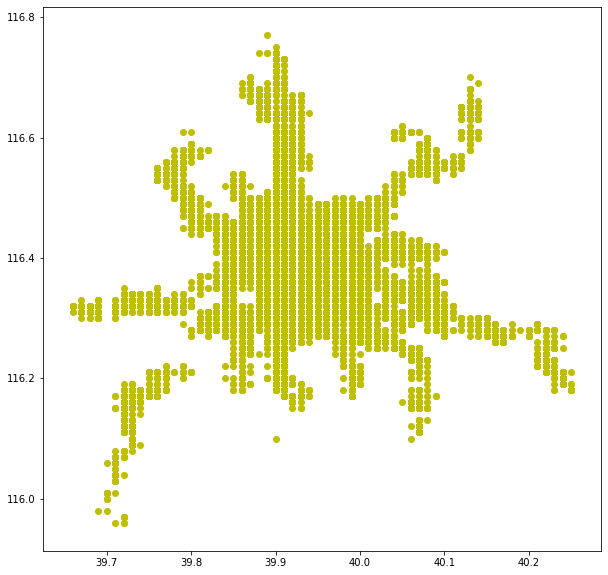

In [28]:
fig, test = plt.subplots(figsize=(10,10))
test.scatter(new_df.o_lat, new_df.o_long, color='y', alpha=1)

In [56]:
t = []
for i in districts:
    t.append(int(i))

t

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

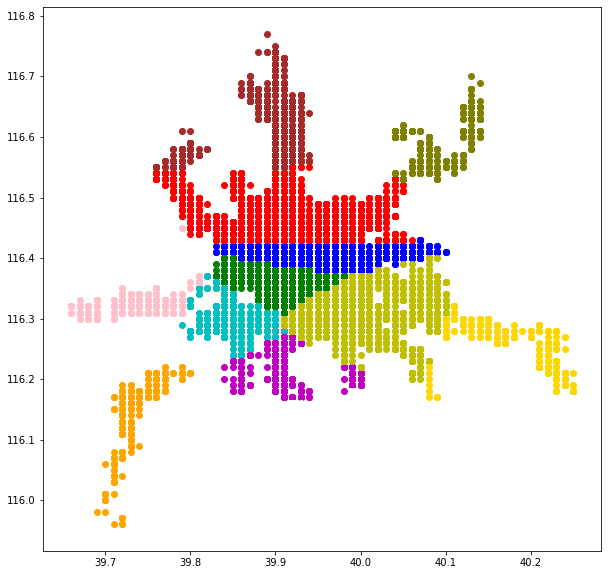

In [61]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'w', 'orange', 'brown', 'olive', 'gold', 'pink', 'aqua', 'lime', 'beige', 'indigo']
fig, ax = plt.subplots(figsize=(10,10))

for each in districts:
    df = new_df[new_df.o_district == each]
    ax.scatter(df.o_lat, df.o_long, color=colors[each], alpha=1)

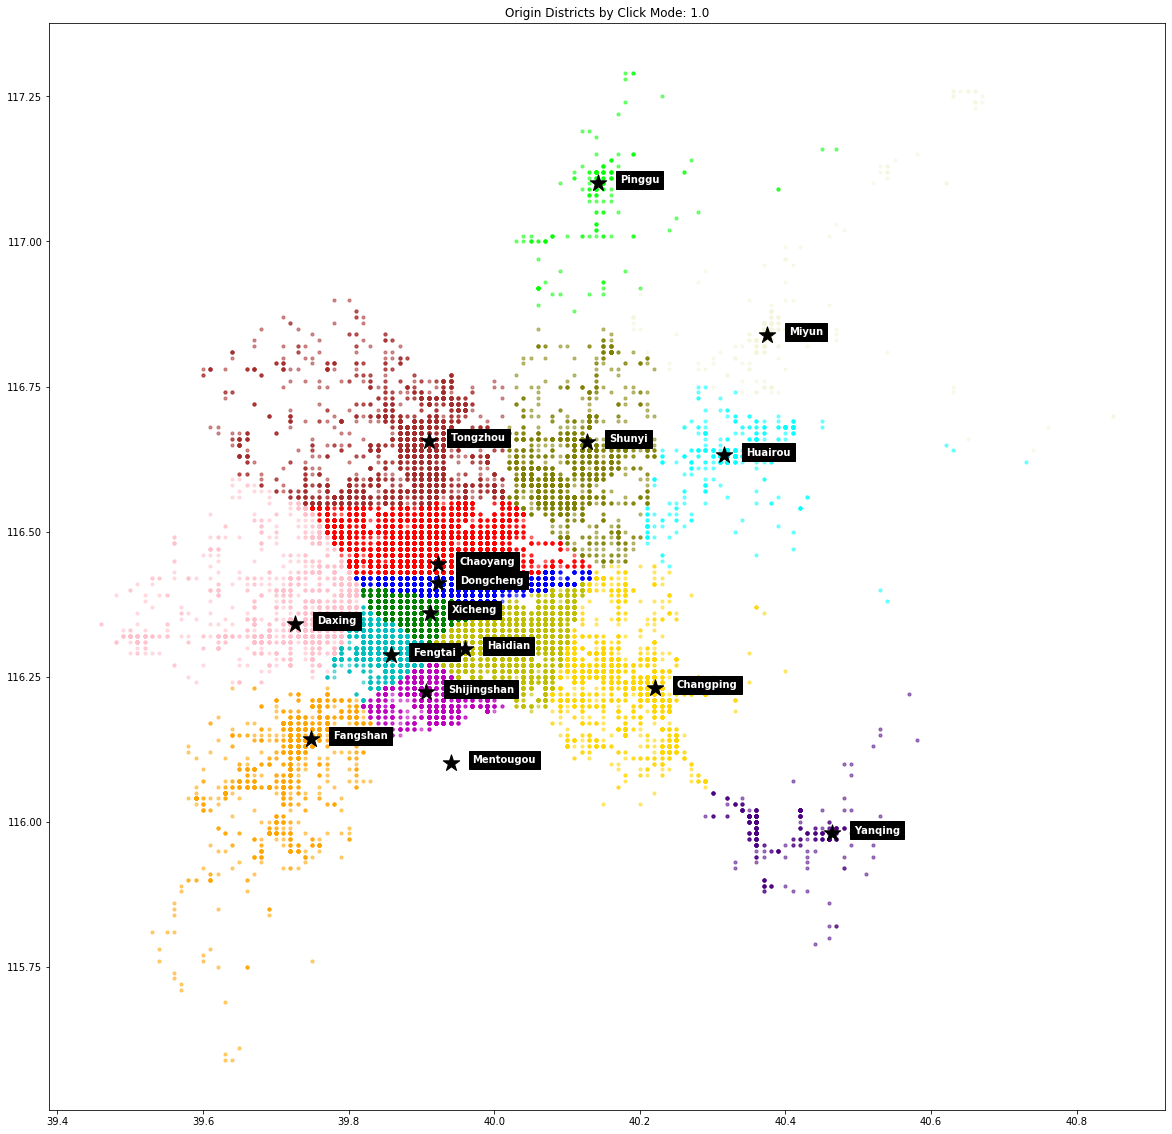

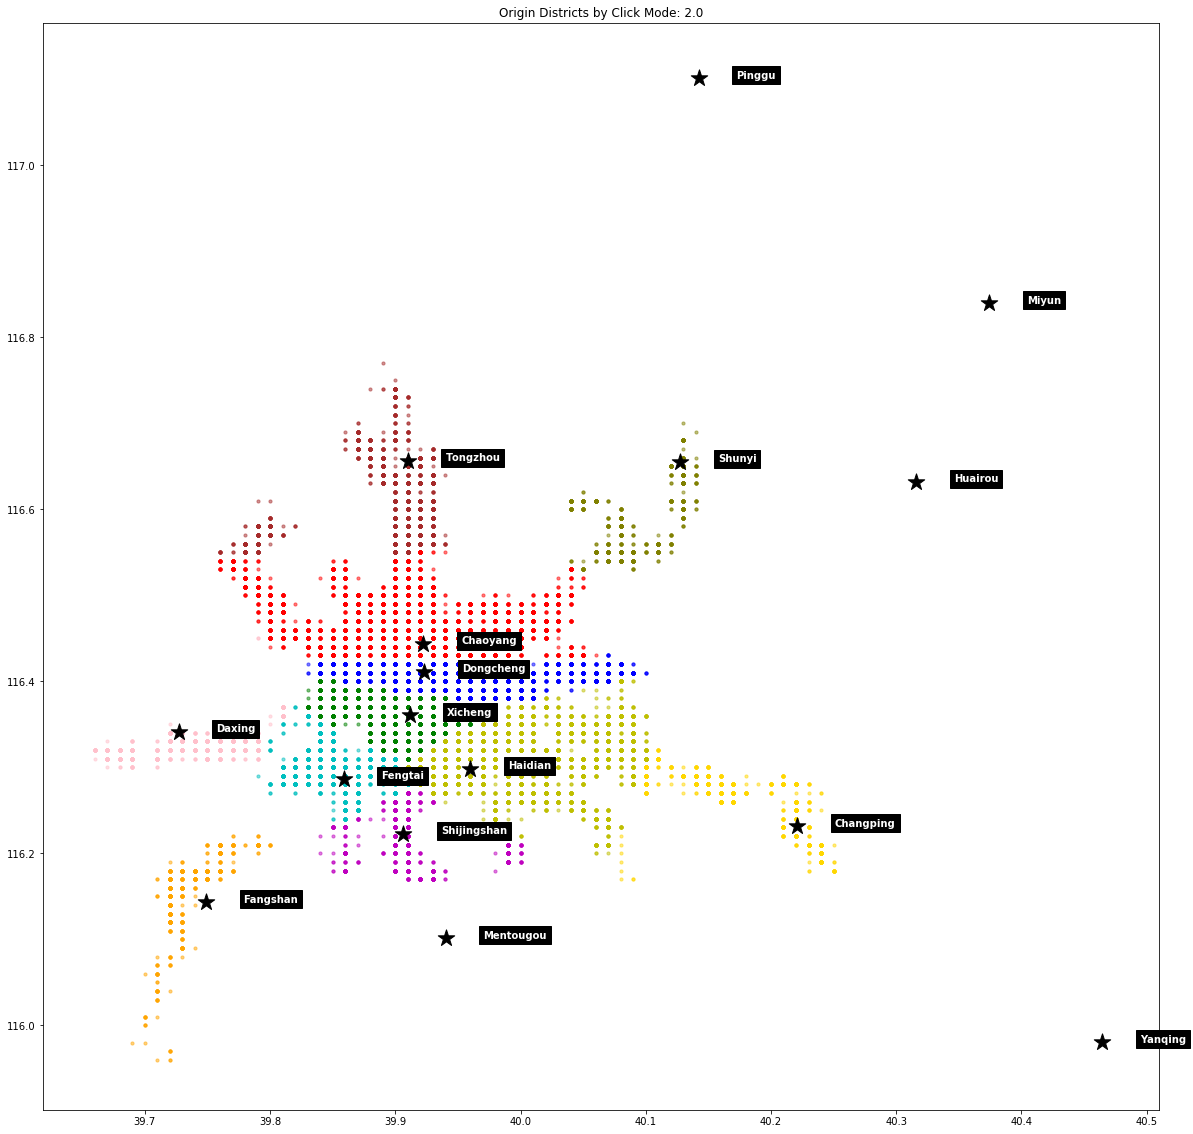

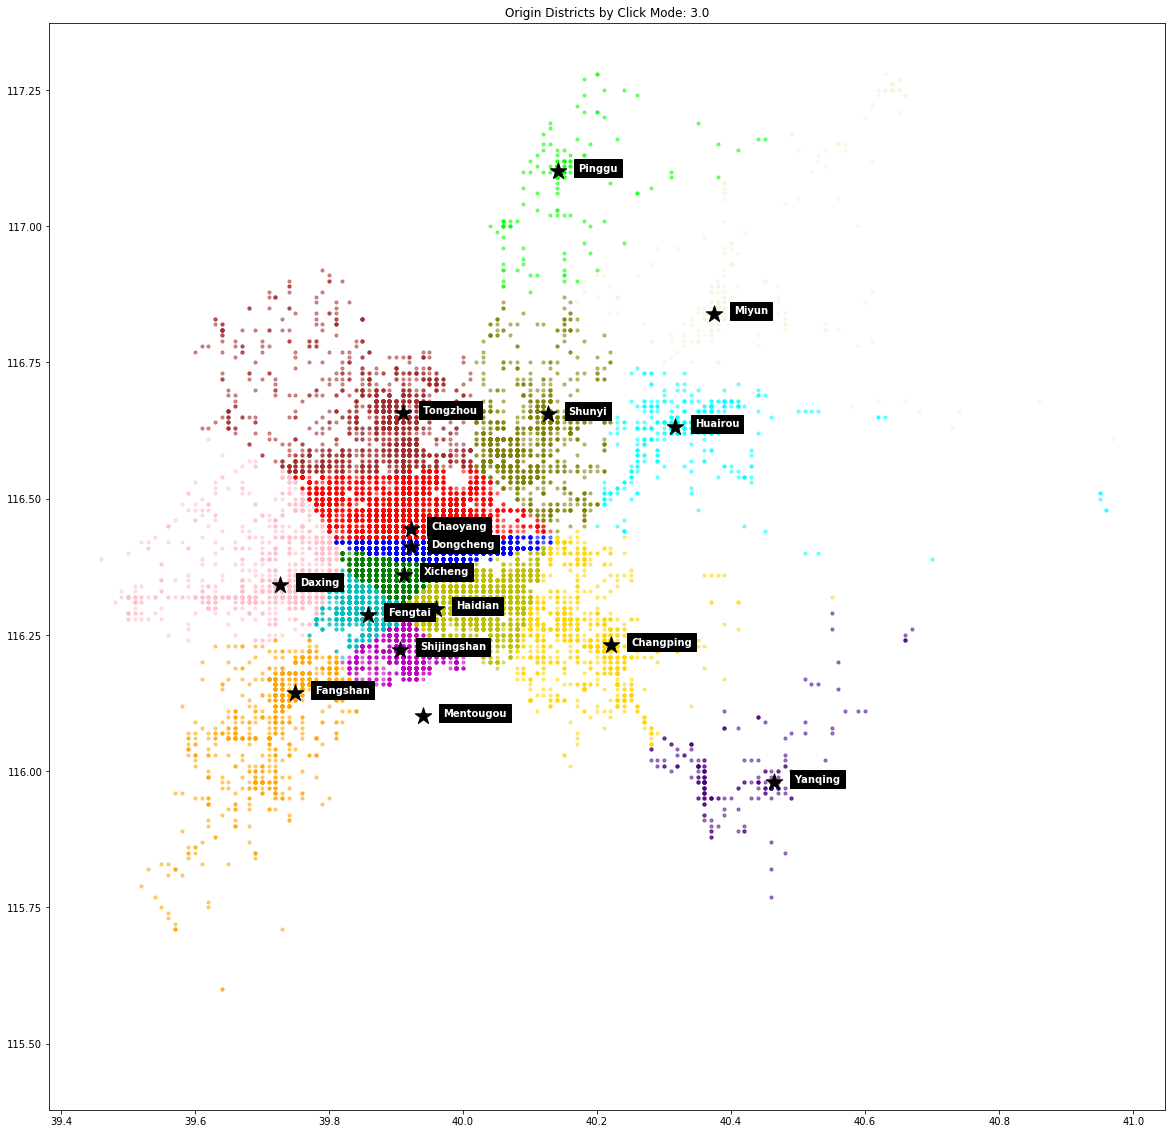

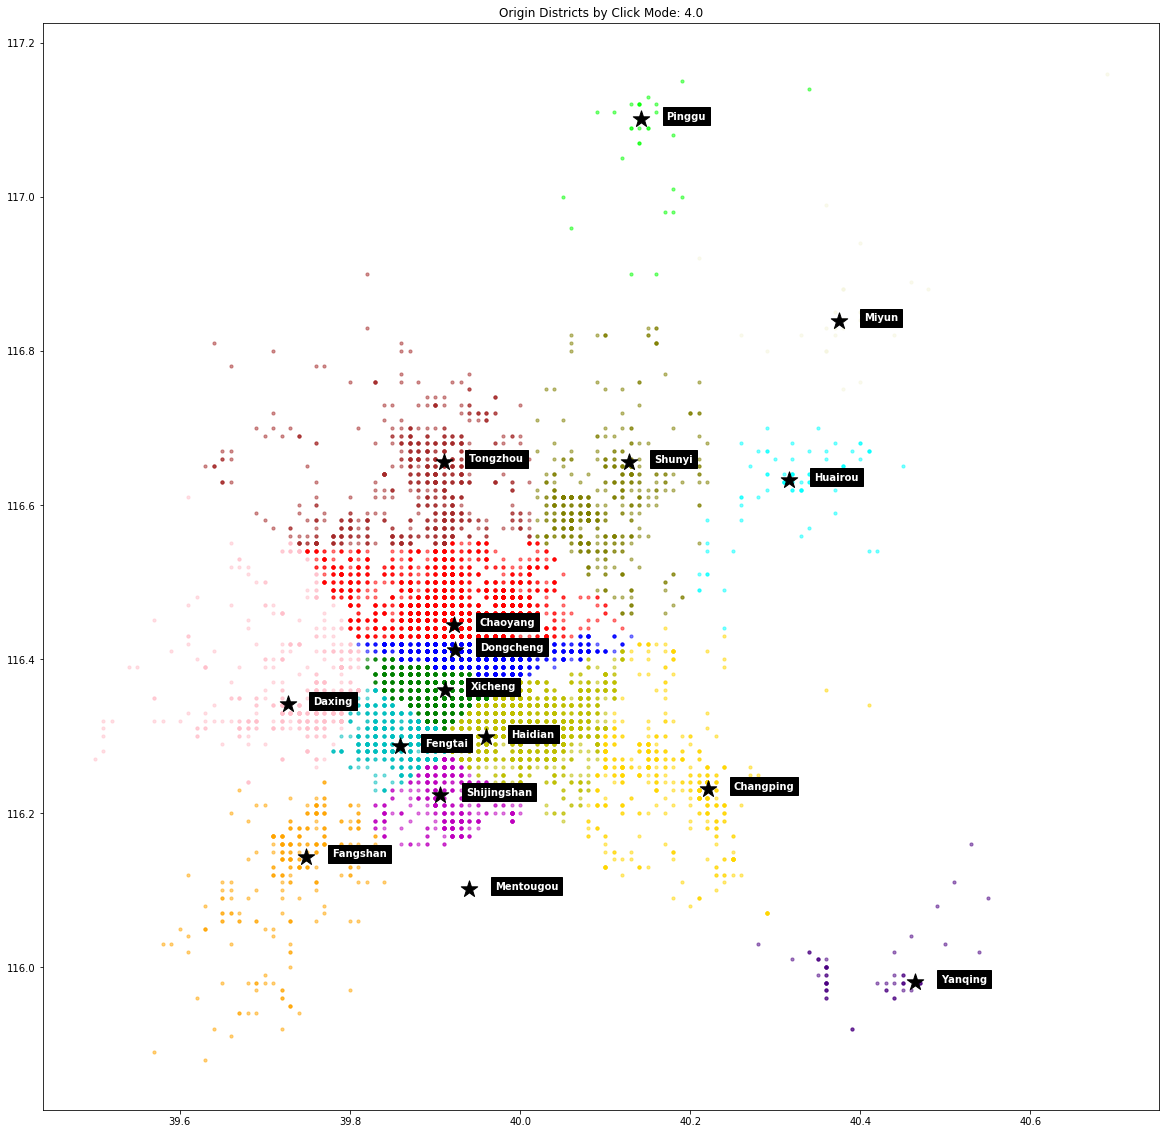

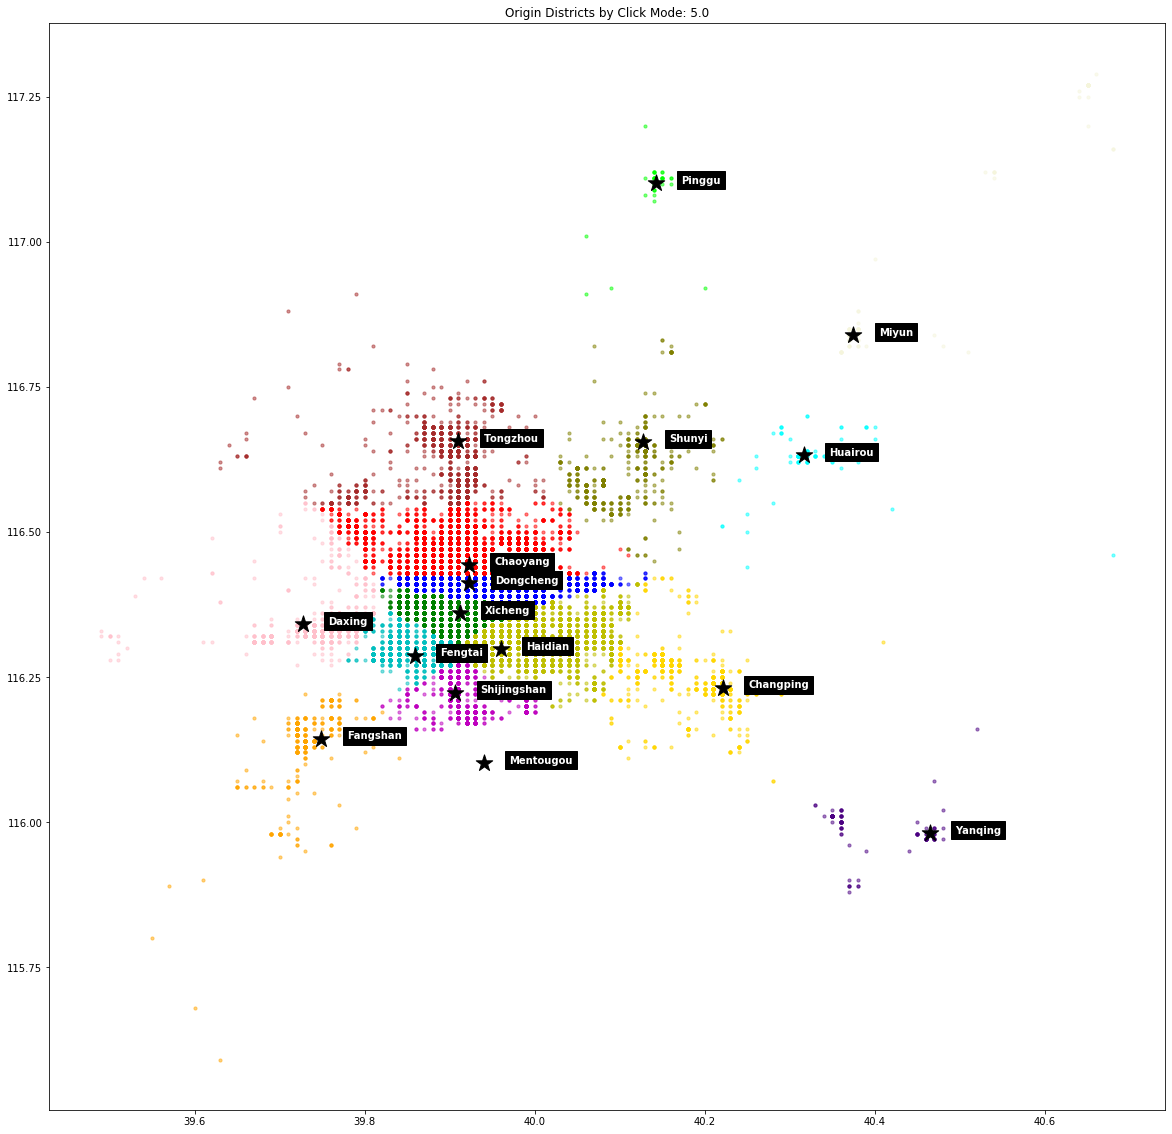

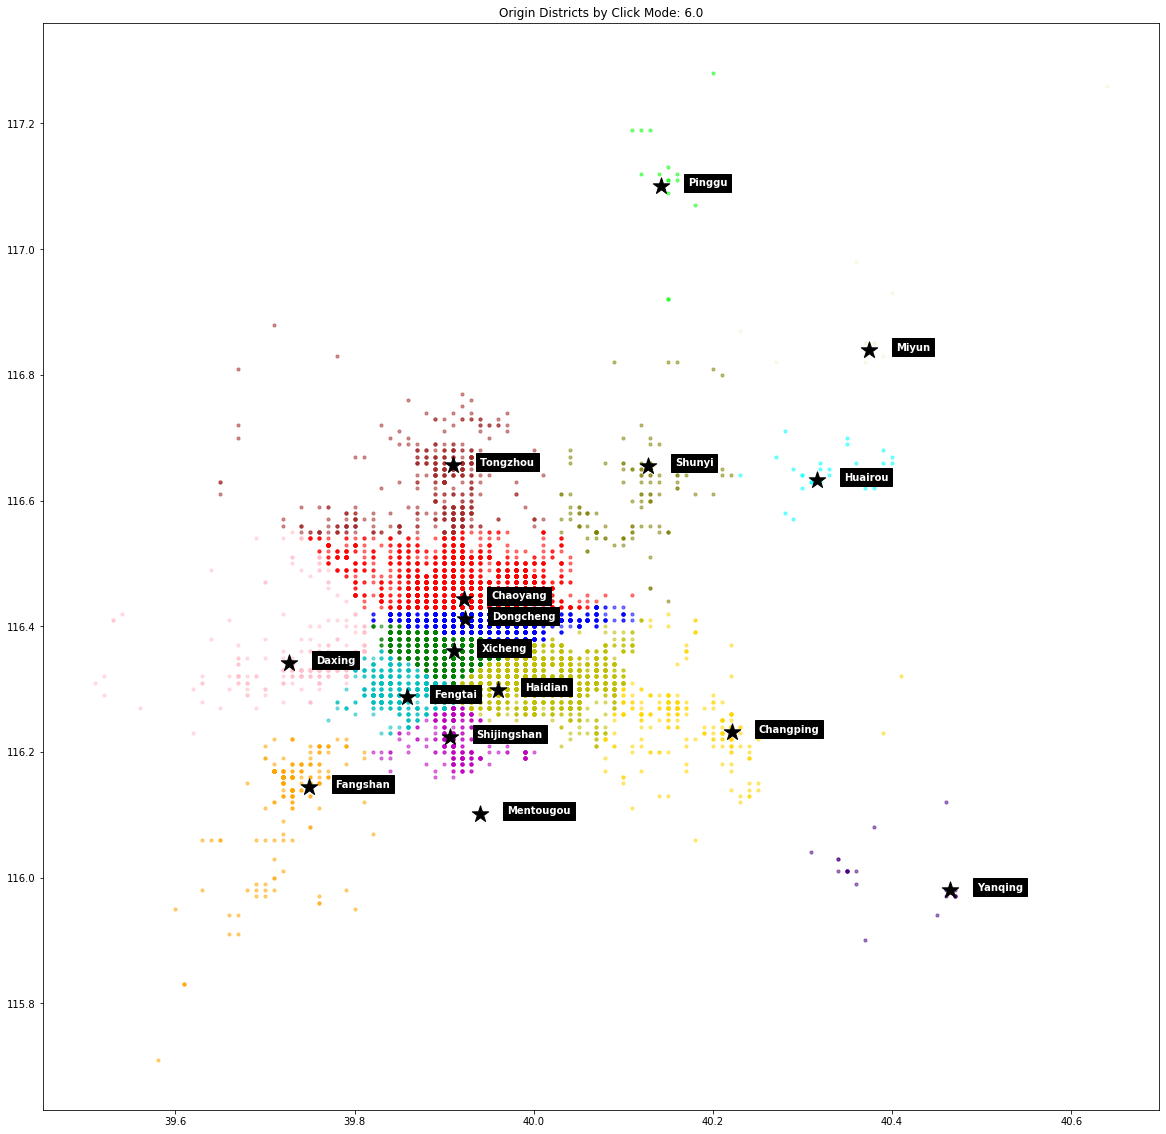

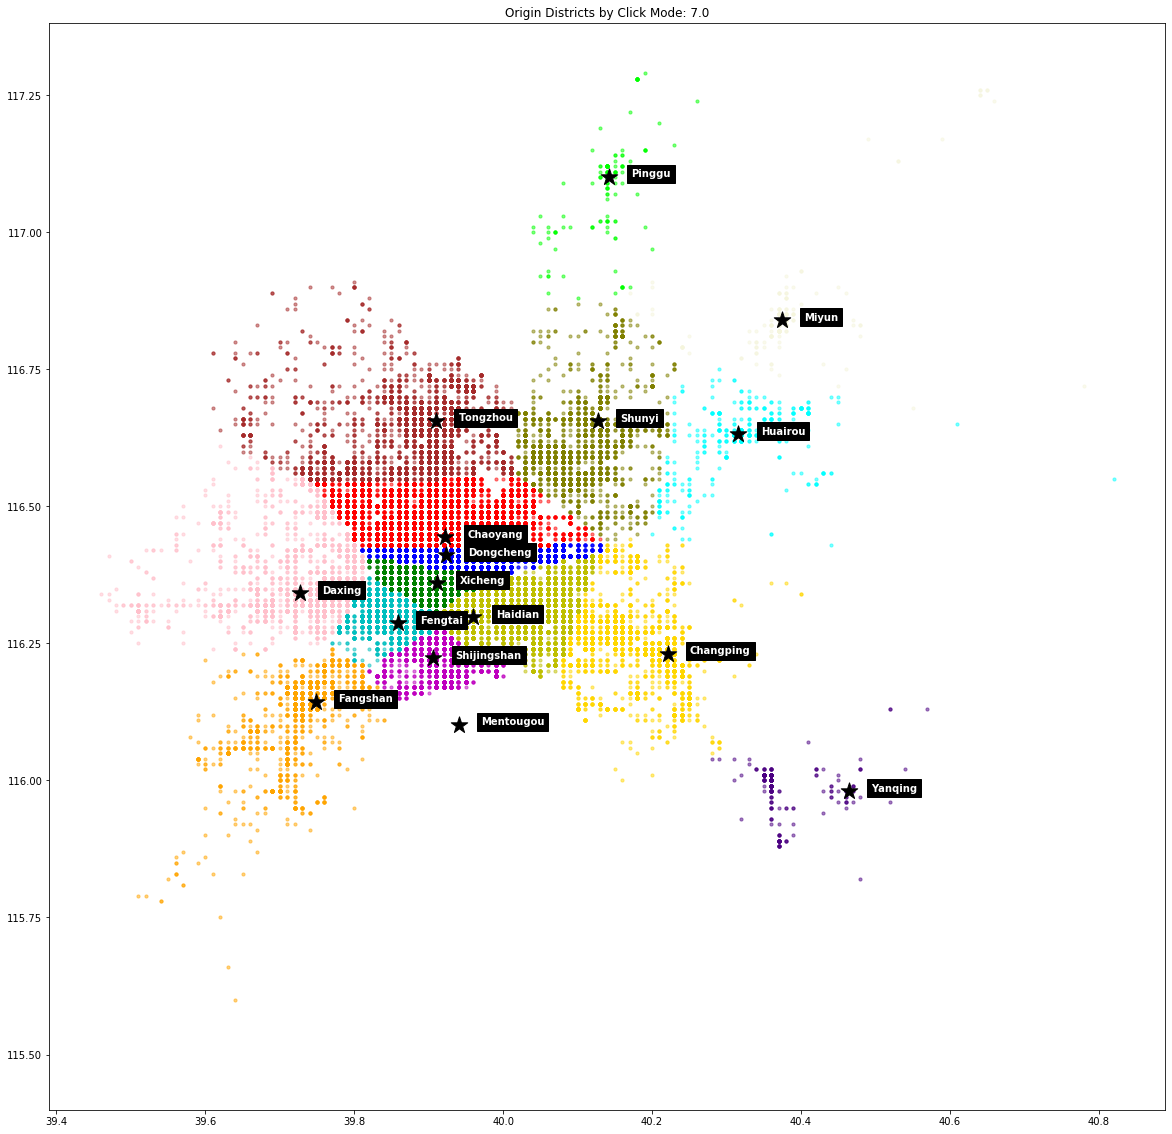

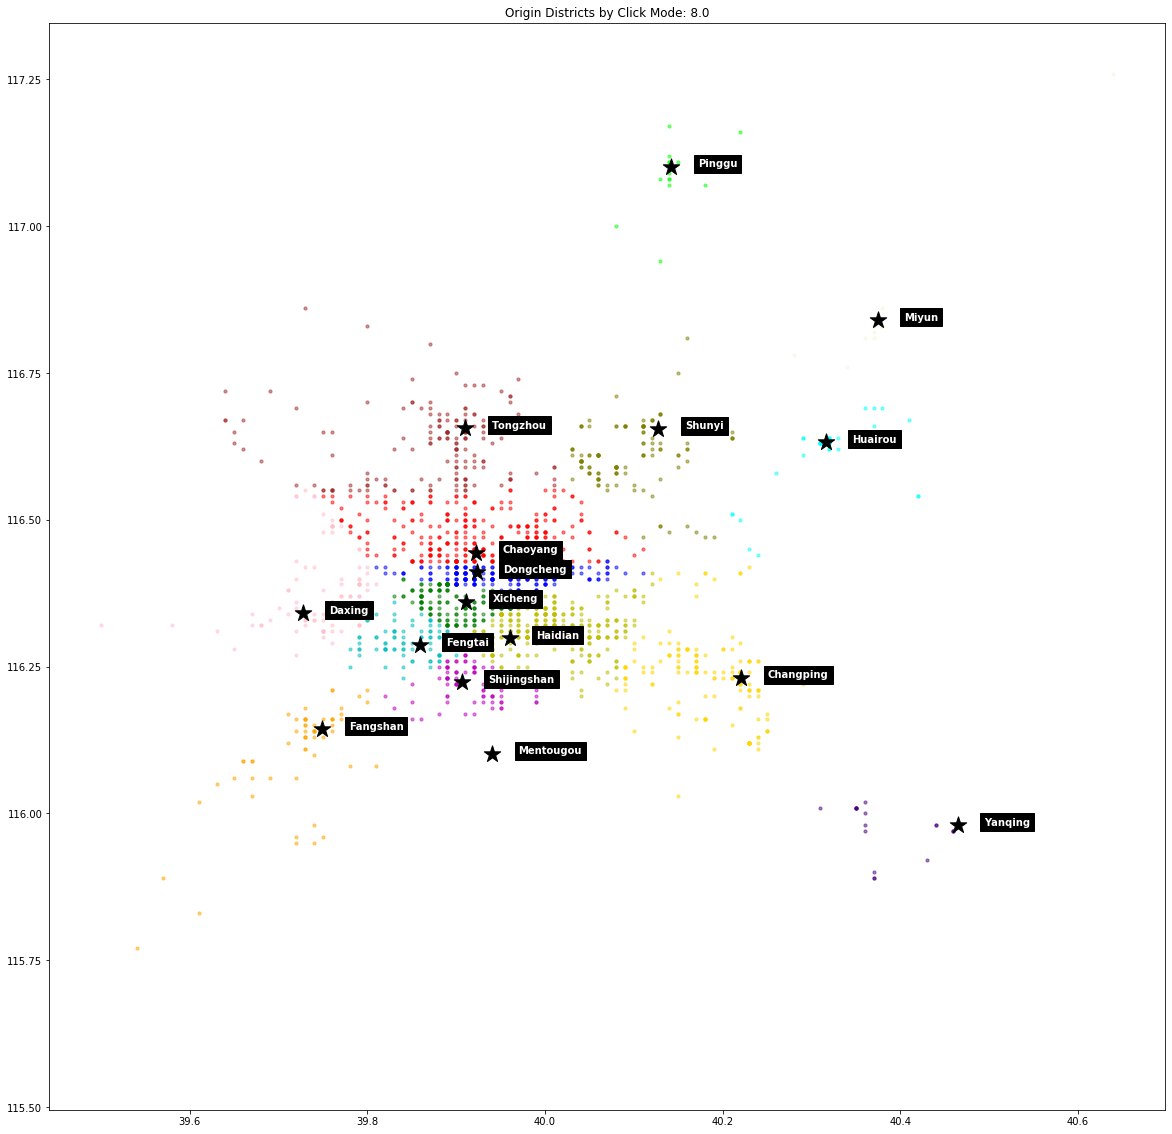

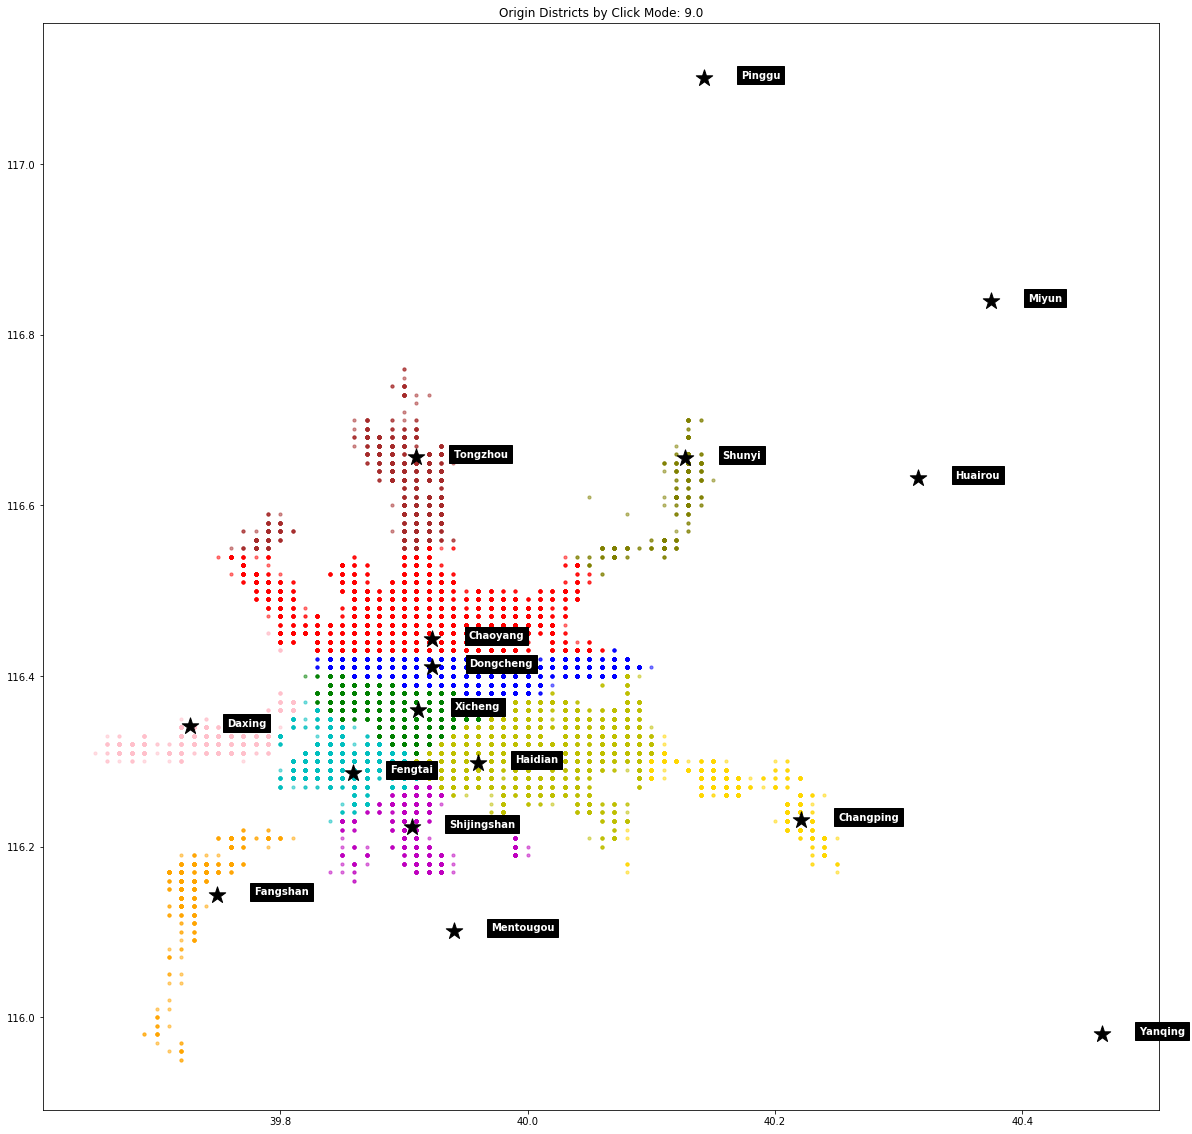

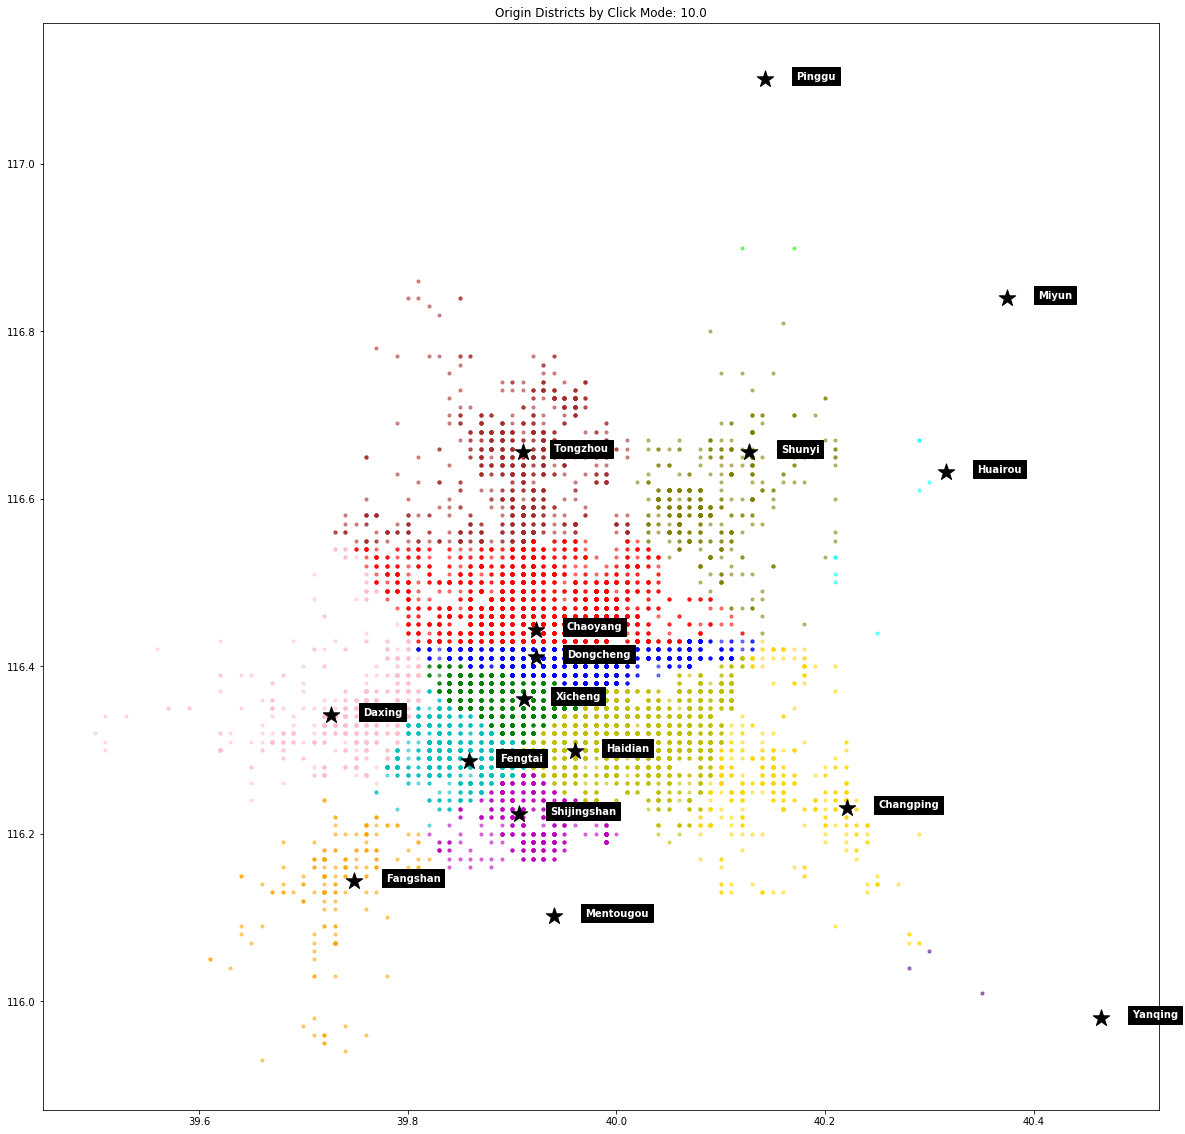

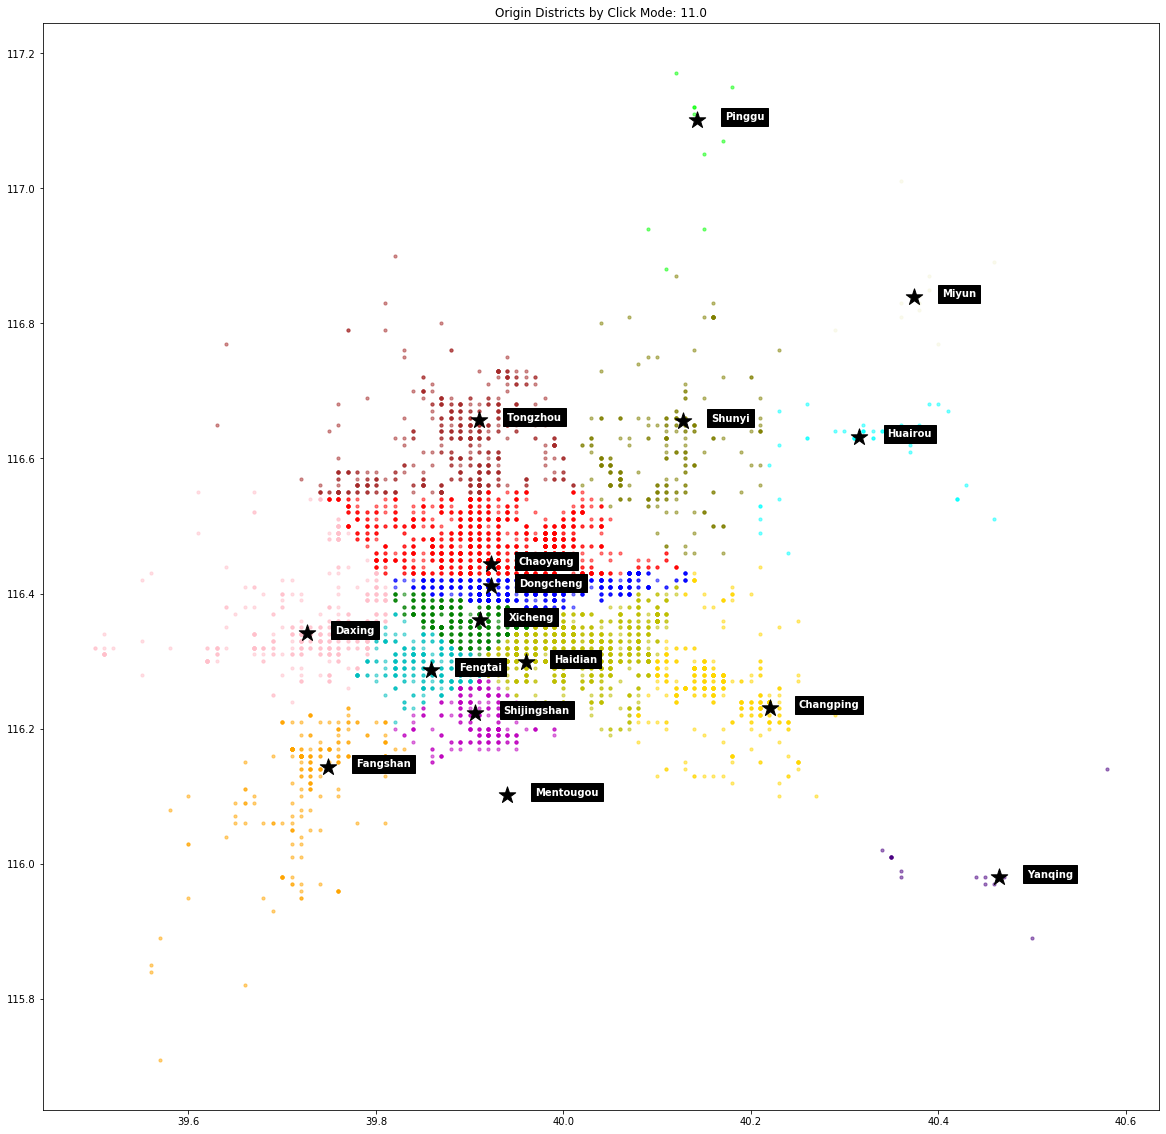

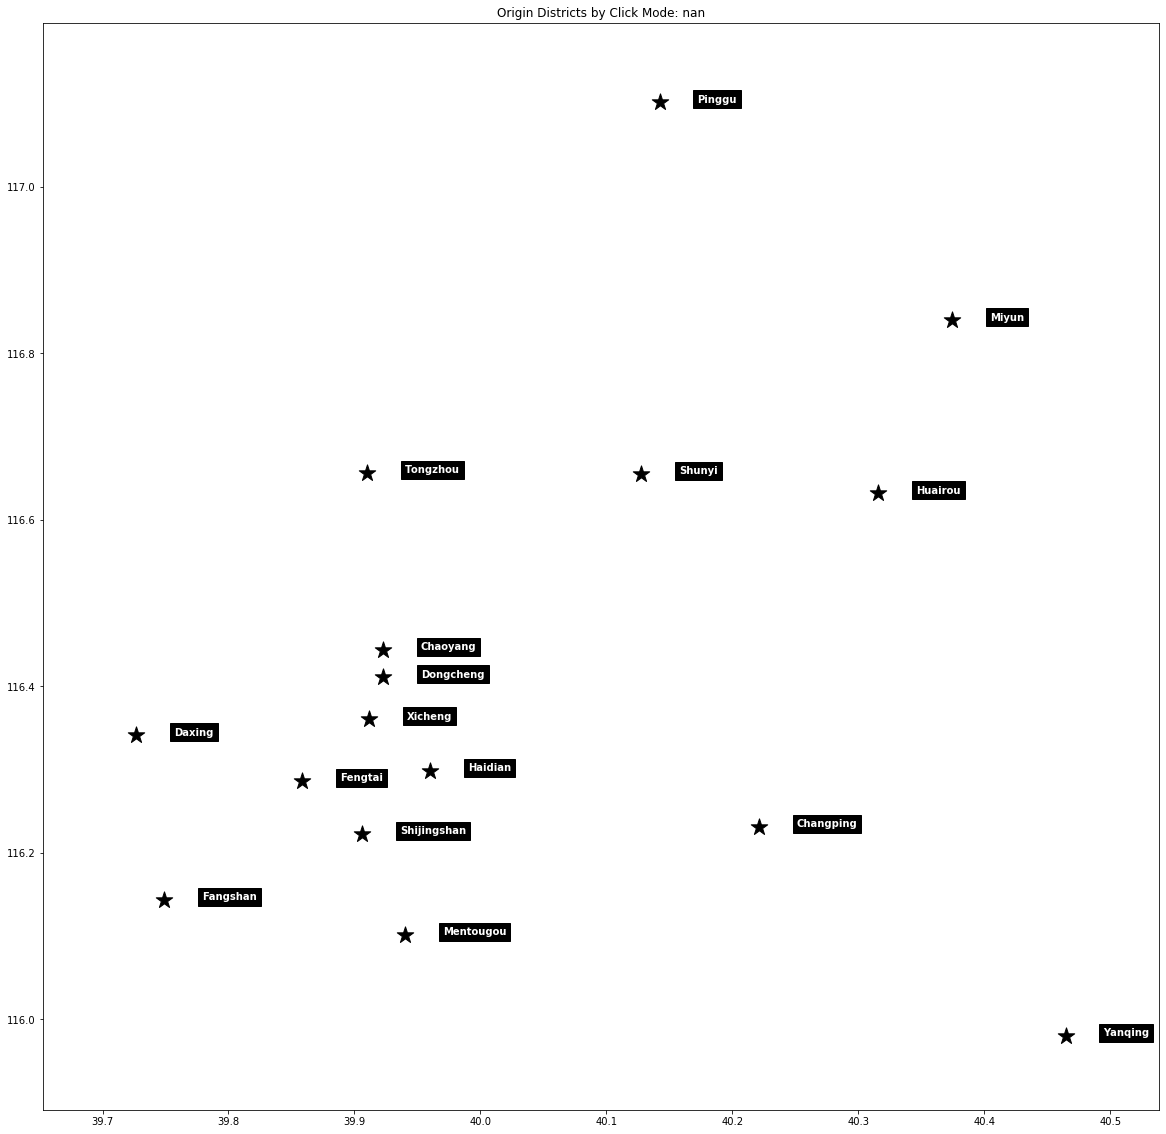

In [74]:
for cm in click_modes:
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'w', 'orange', 'brown', 'olive', 'gold', 'pink', 'aqua', 'lime', 'beige', 'indigo']
    fig, ax = plt.subplots(figsize=(20,20))
    plt.title(f'Origin Districts by Click Mode: {cm}')
    
    #excerpt data frame by click mode
    new_df = df_districts[df_districts.click_mode == cm]    
    
    #change color for every district
    for each in districts:
        df = new_df[new_df.o_district == each]
        ax.scatter(df.o_lat, df.o_long, s=10, color=colors[each], alpha=0.5)
    
    #plot district centroids
    ax.scatter(beijing_districts.o_lat, beijing_districts.o_long, color='k', marker= '*', s=300, alpha=1)
    
    #plot district name next to point
    for dis in range(len(beijing_districts)):
        name = beijing_districts['District'].iloc[dis]
        x = beijing_districts['o_lat'].iloc[dis]+0.03
        y = beijing_districts['o_long'].iloc[dis]
    
        ax.annotate(name, xy=(x, y), size=10, weight='bold', color='white', backgroundcolor='k')

    #save each figure in directory
    fig.savefig(f'../data/external/districts/click_modes/beijing_origin_districts_click_modes_bycolor/beijing_districts_clickmode_{cm}.png')

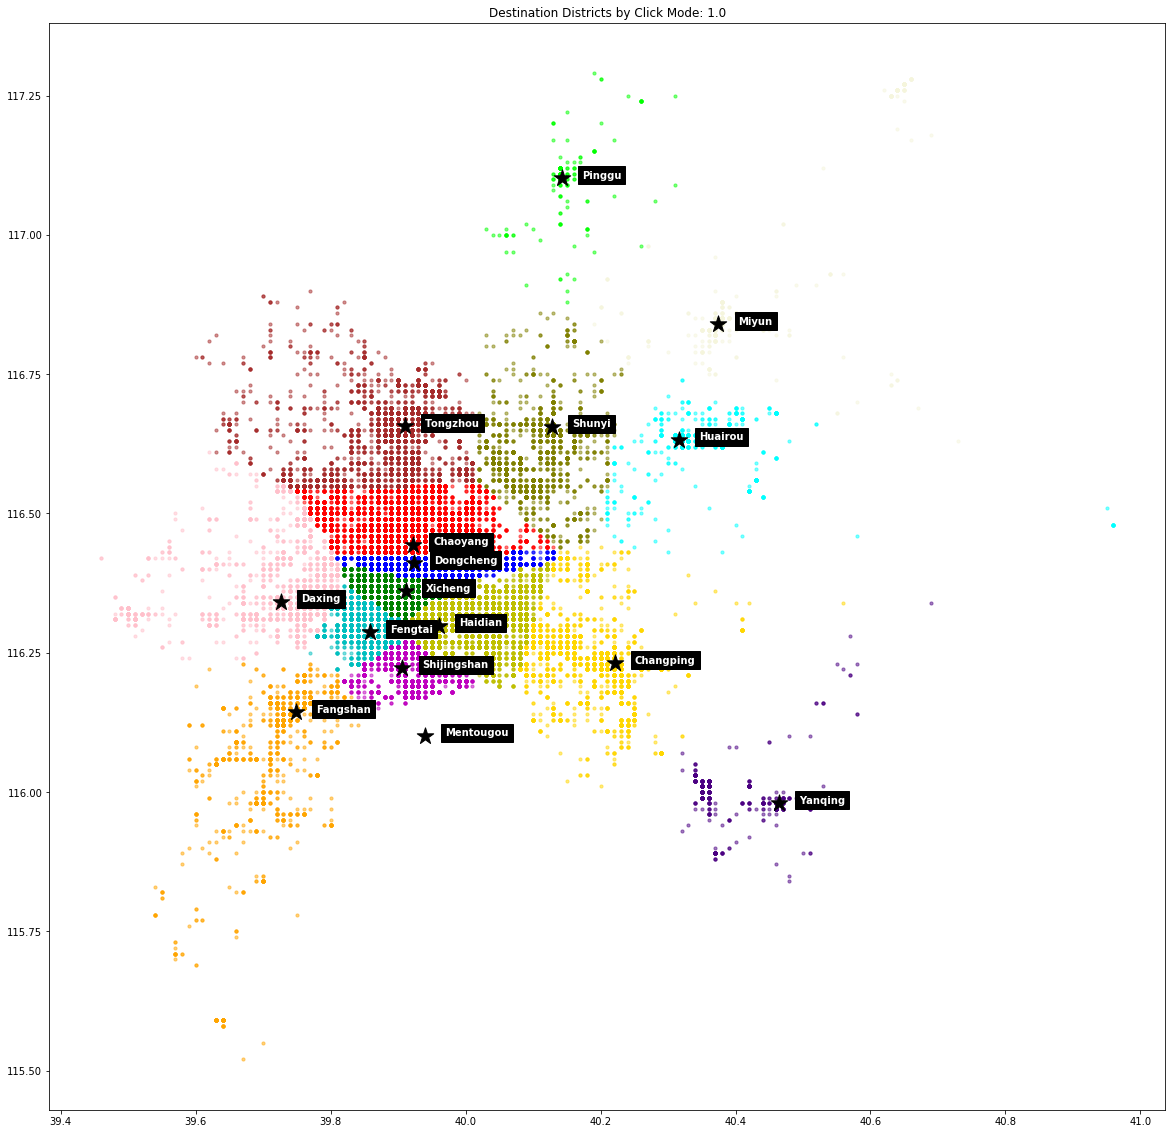

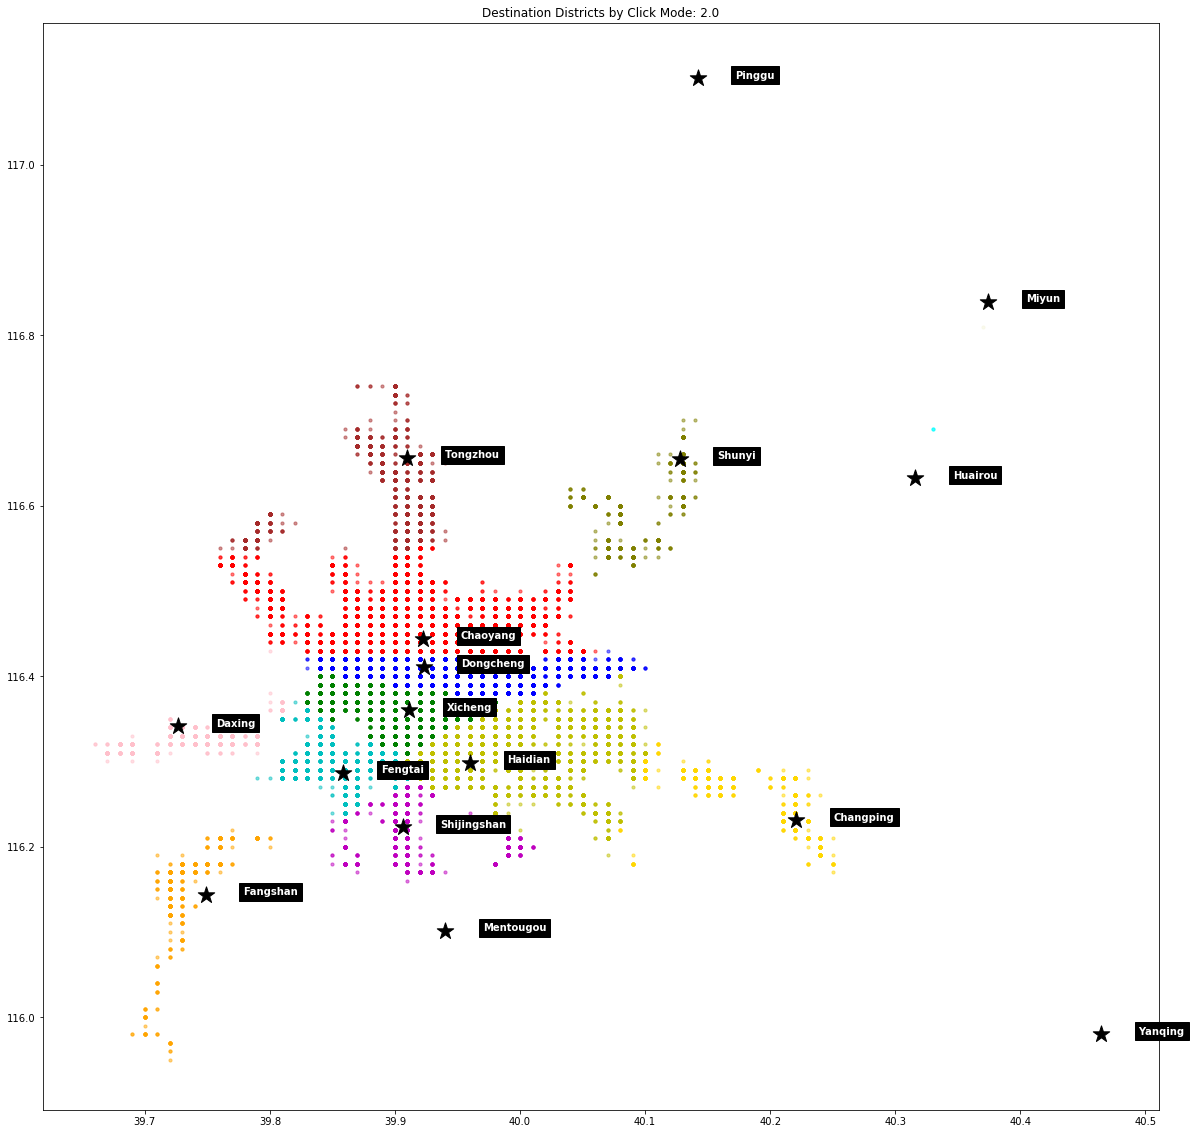

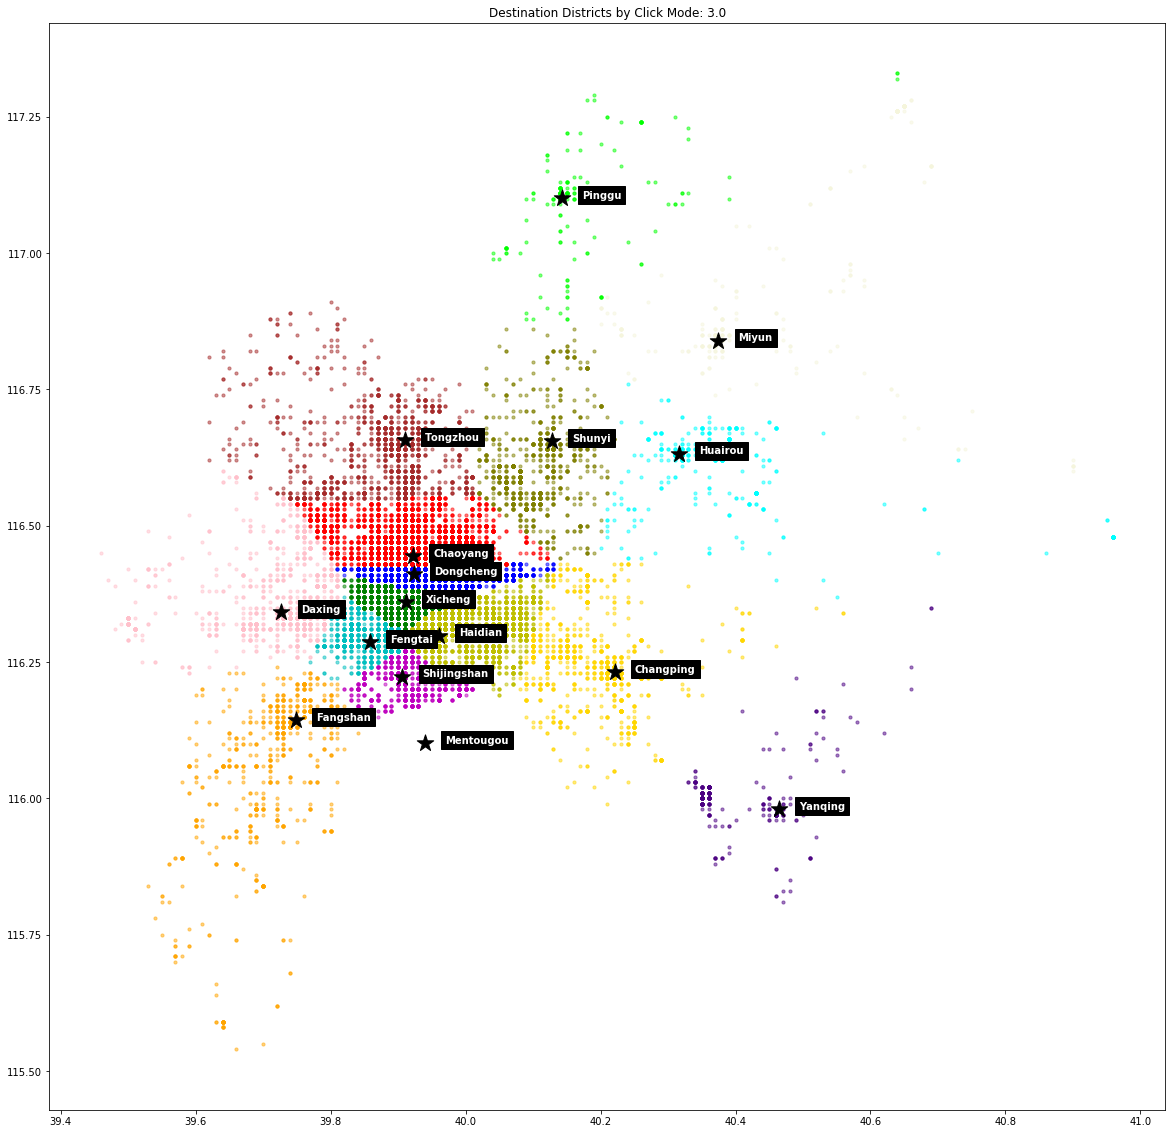

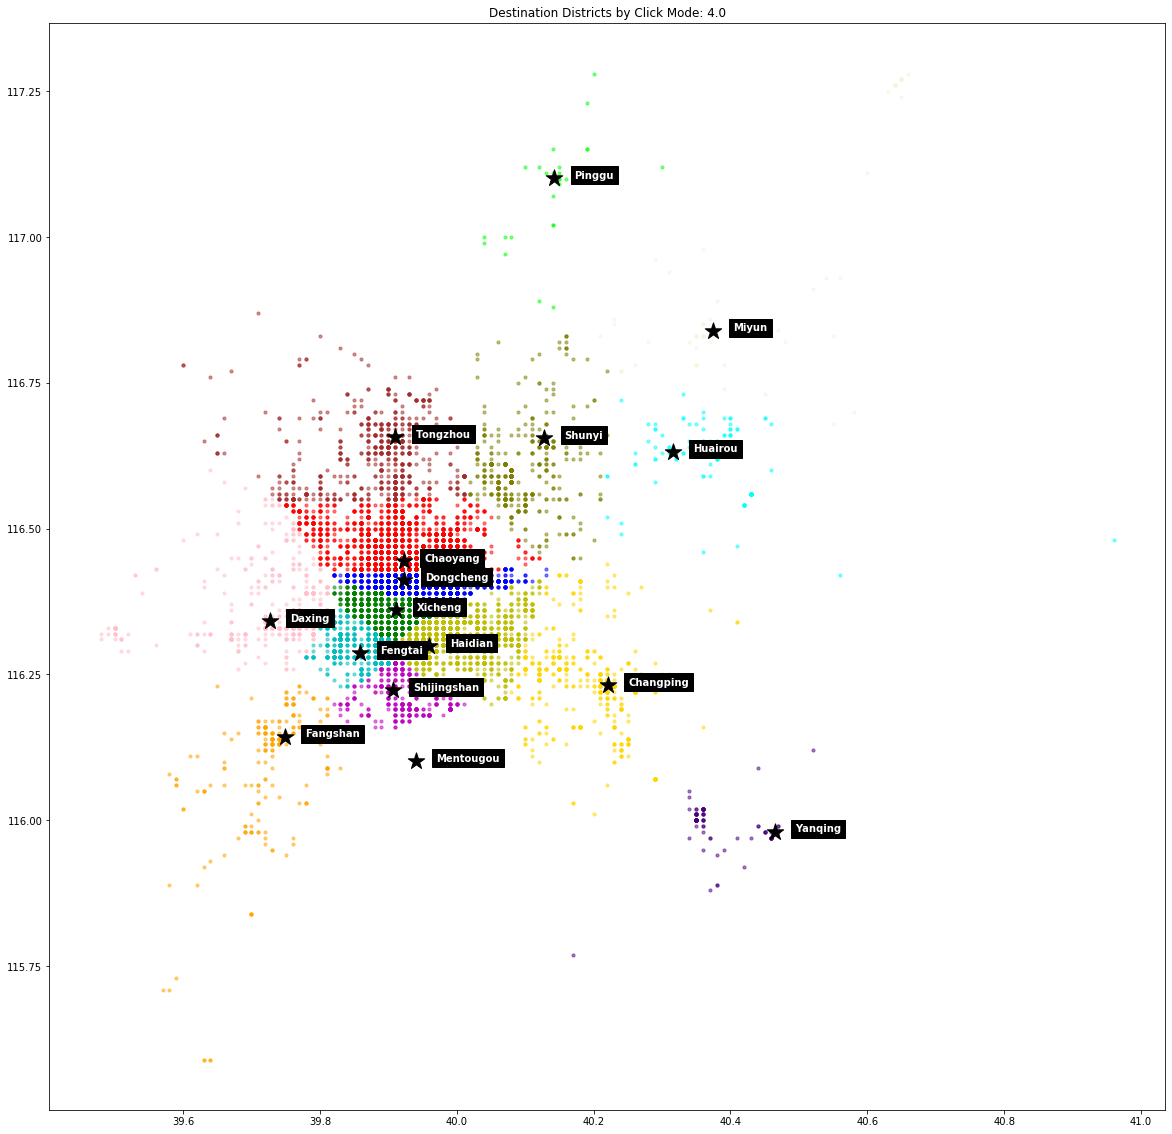

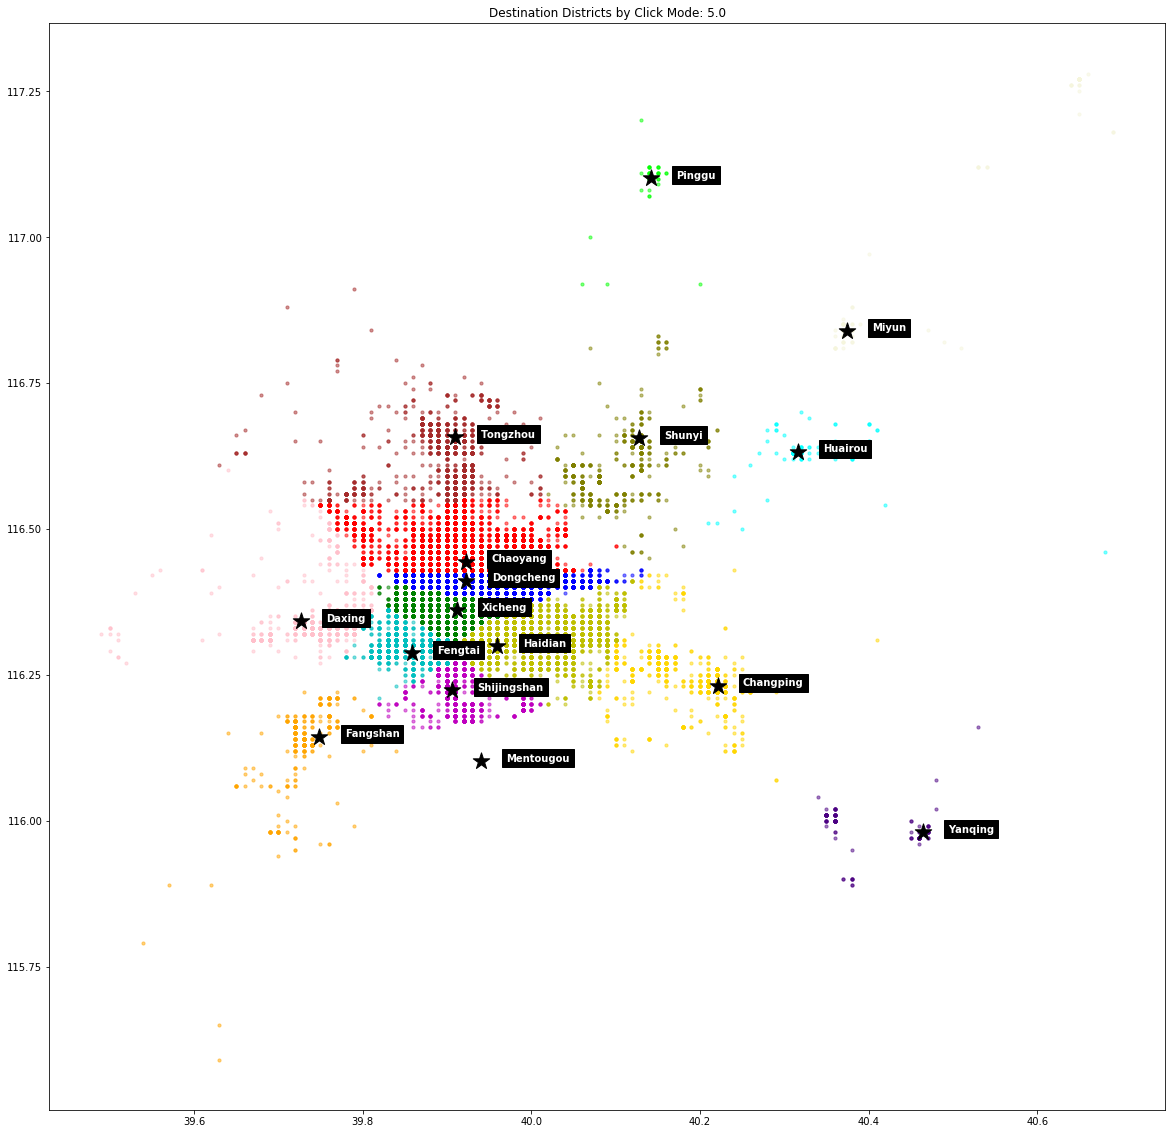

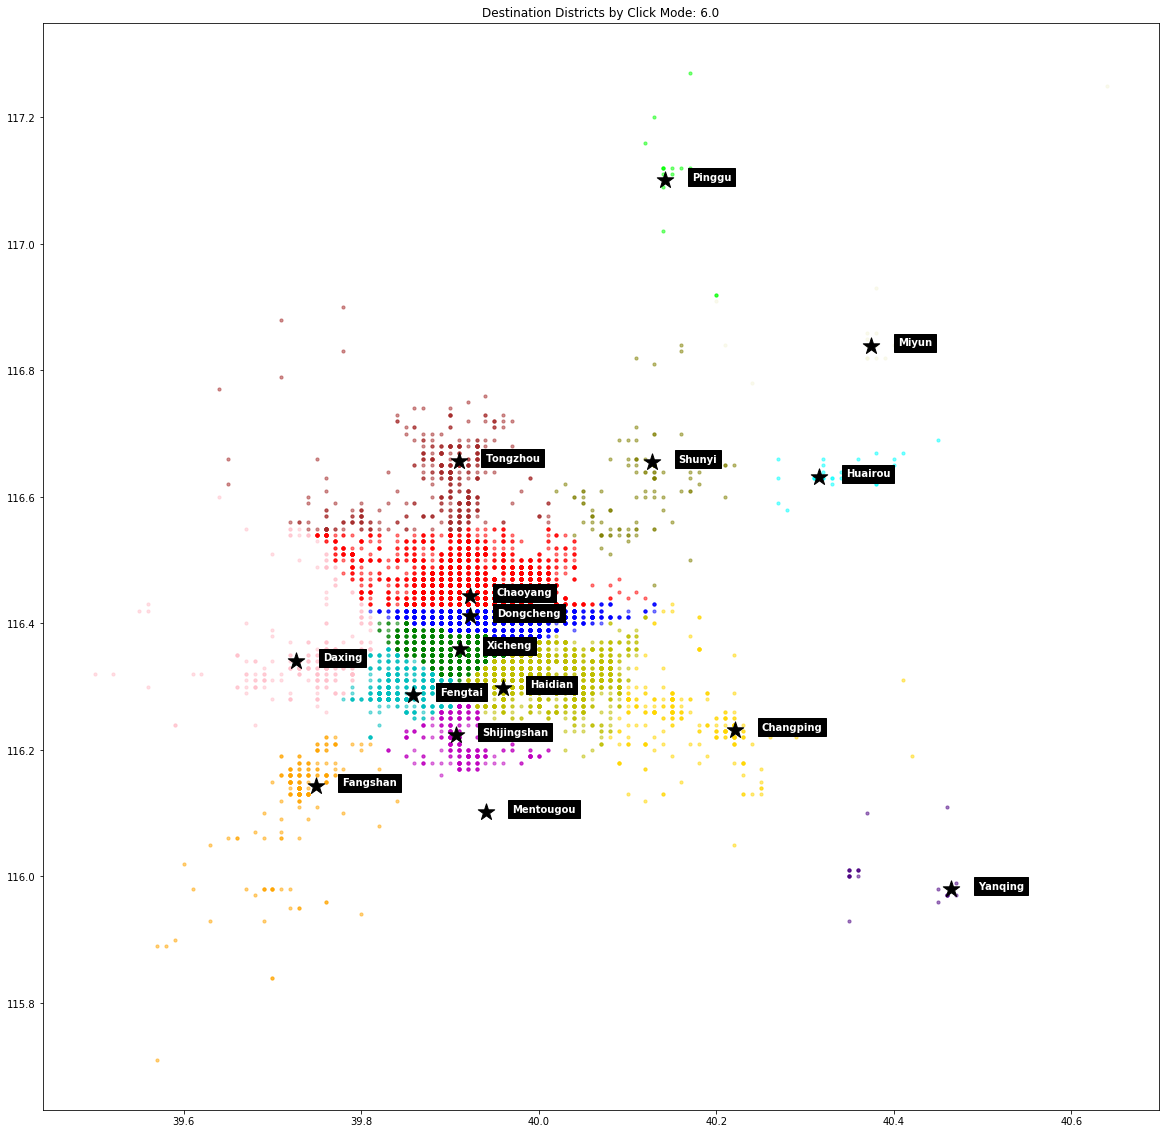

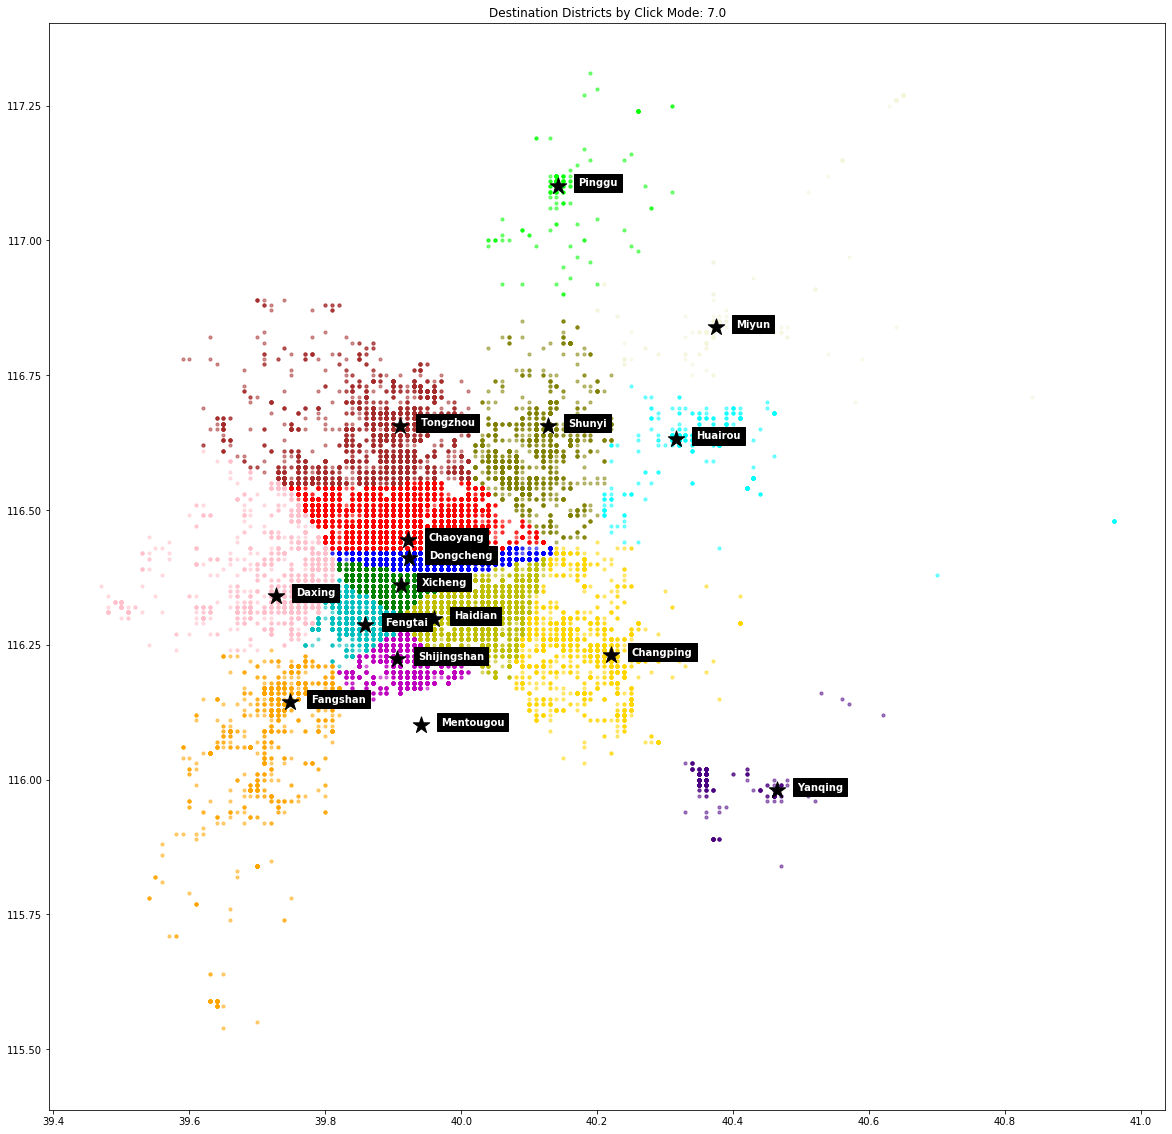

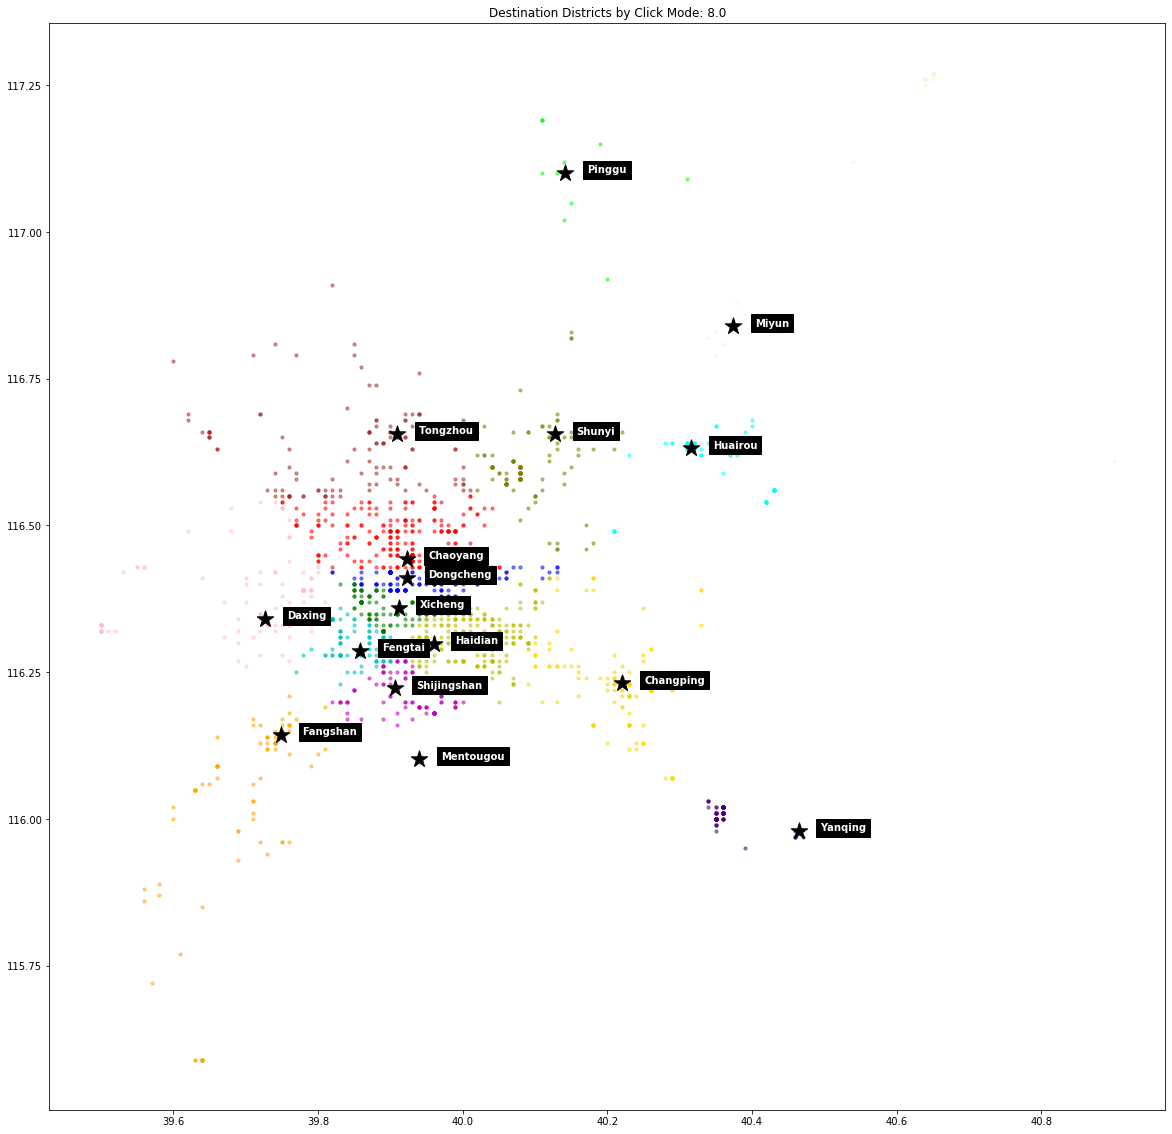

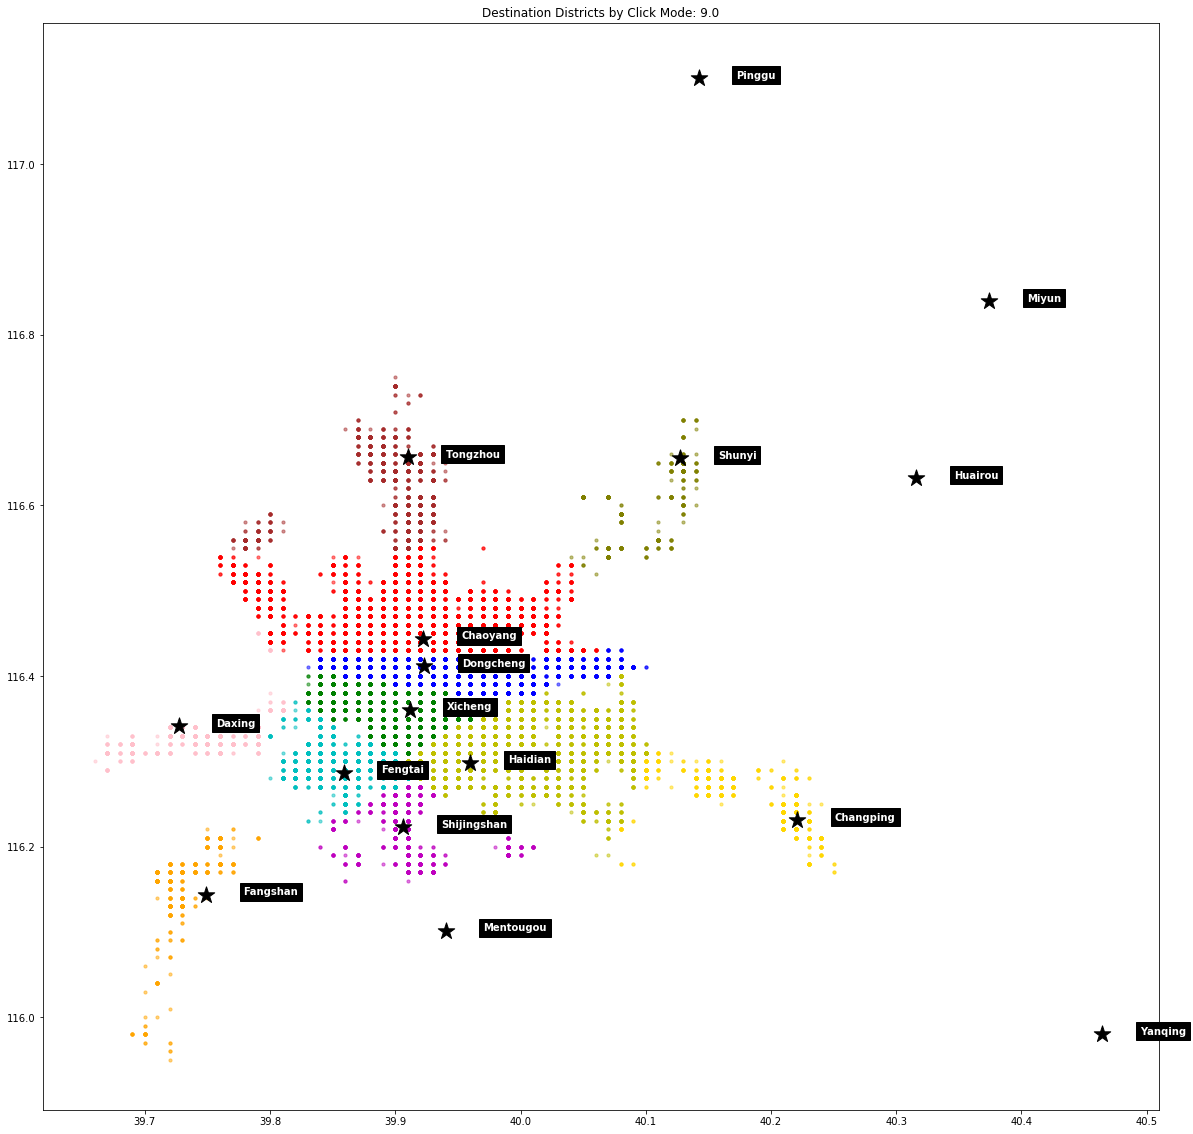

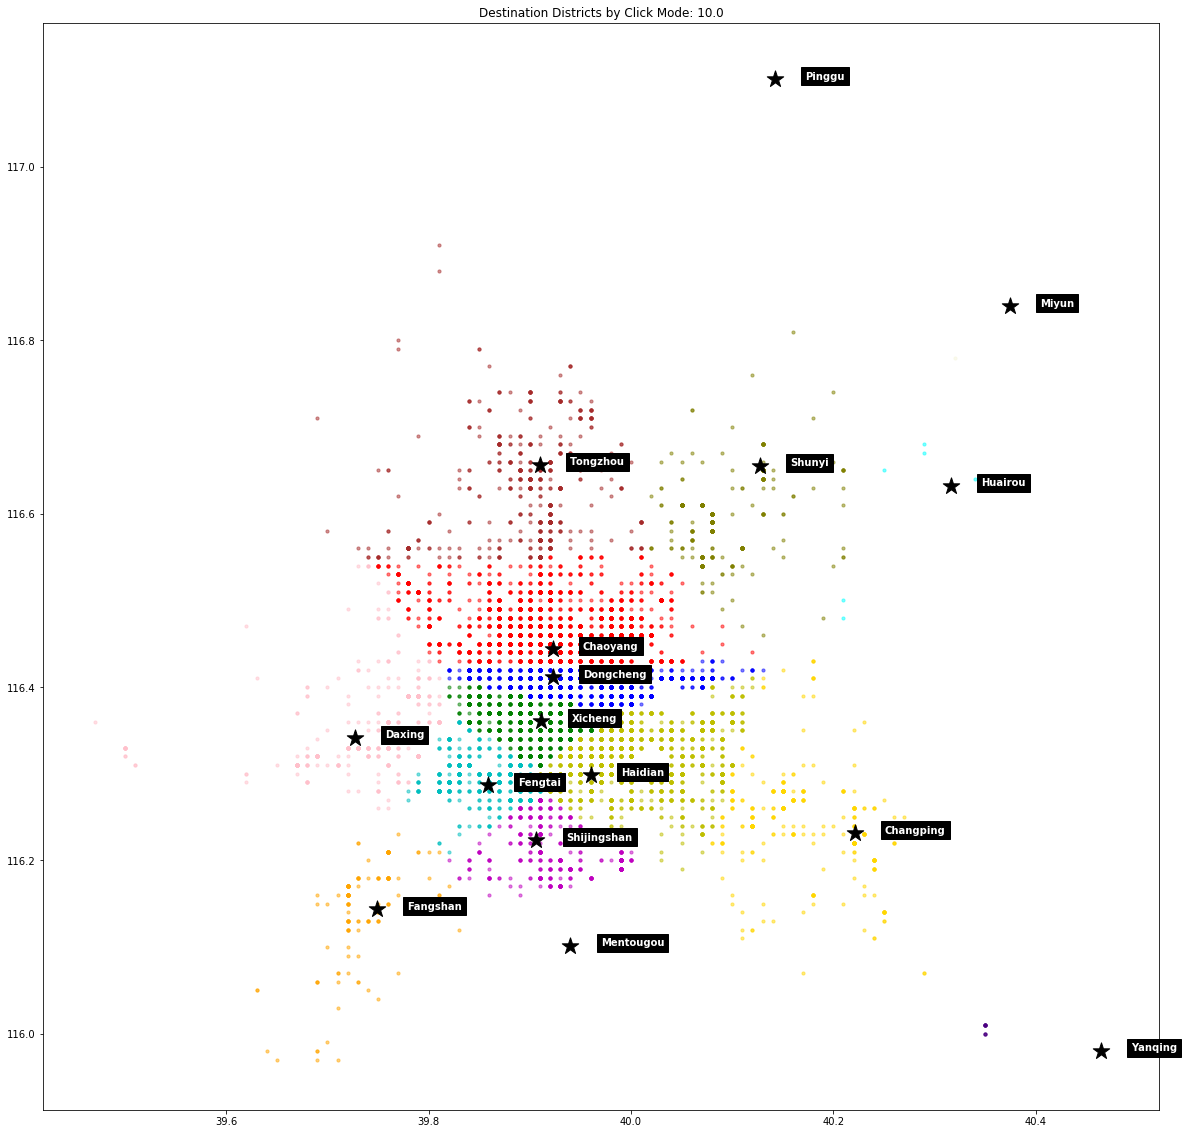

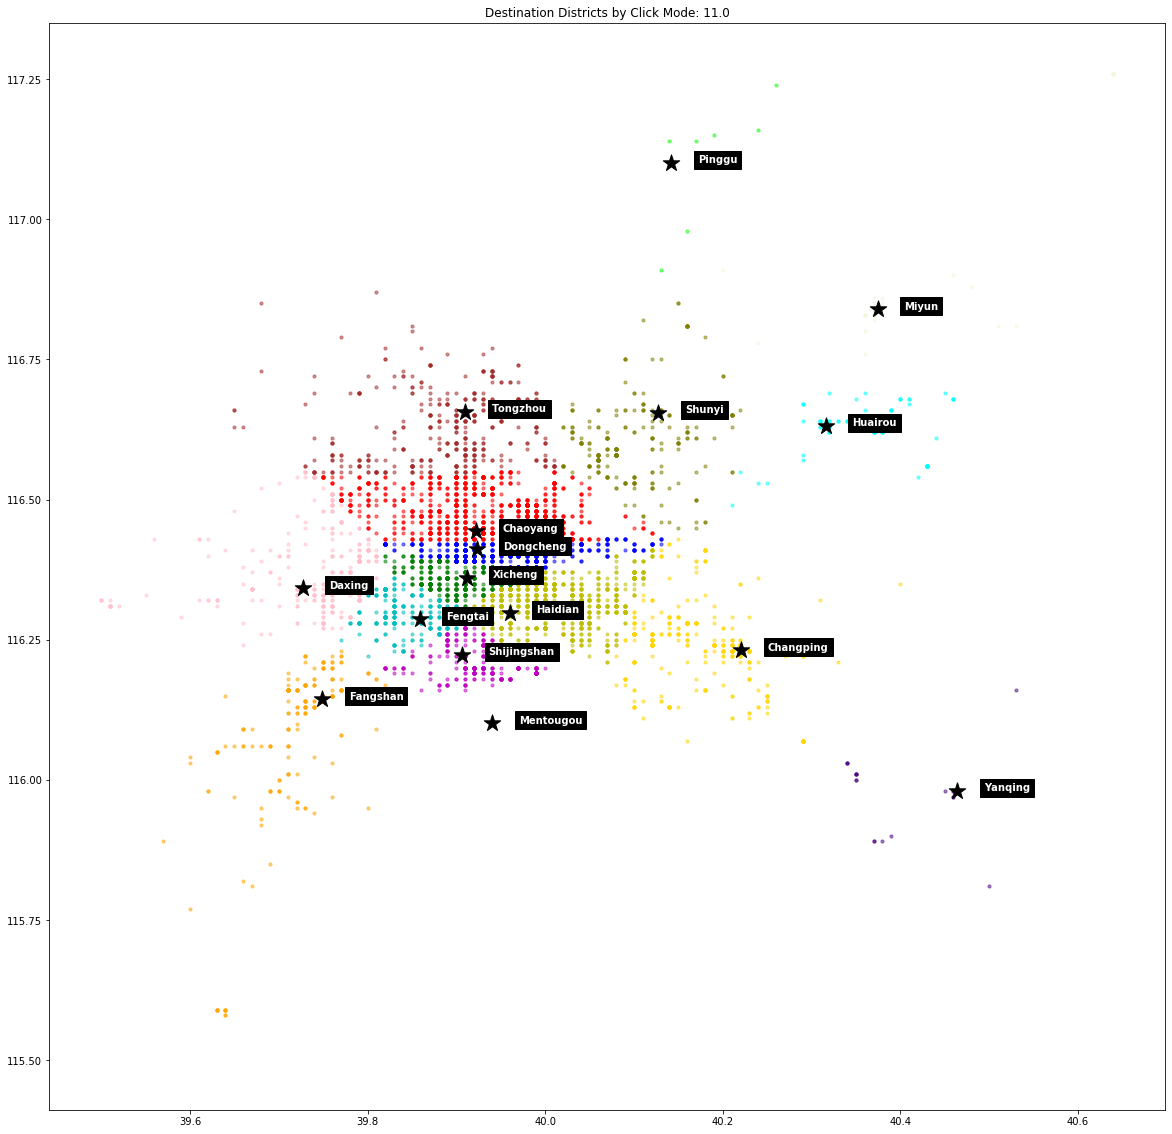

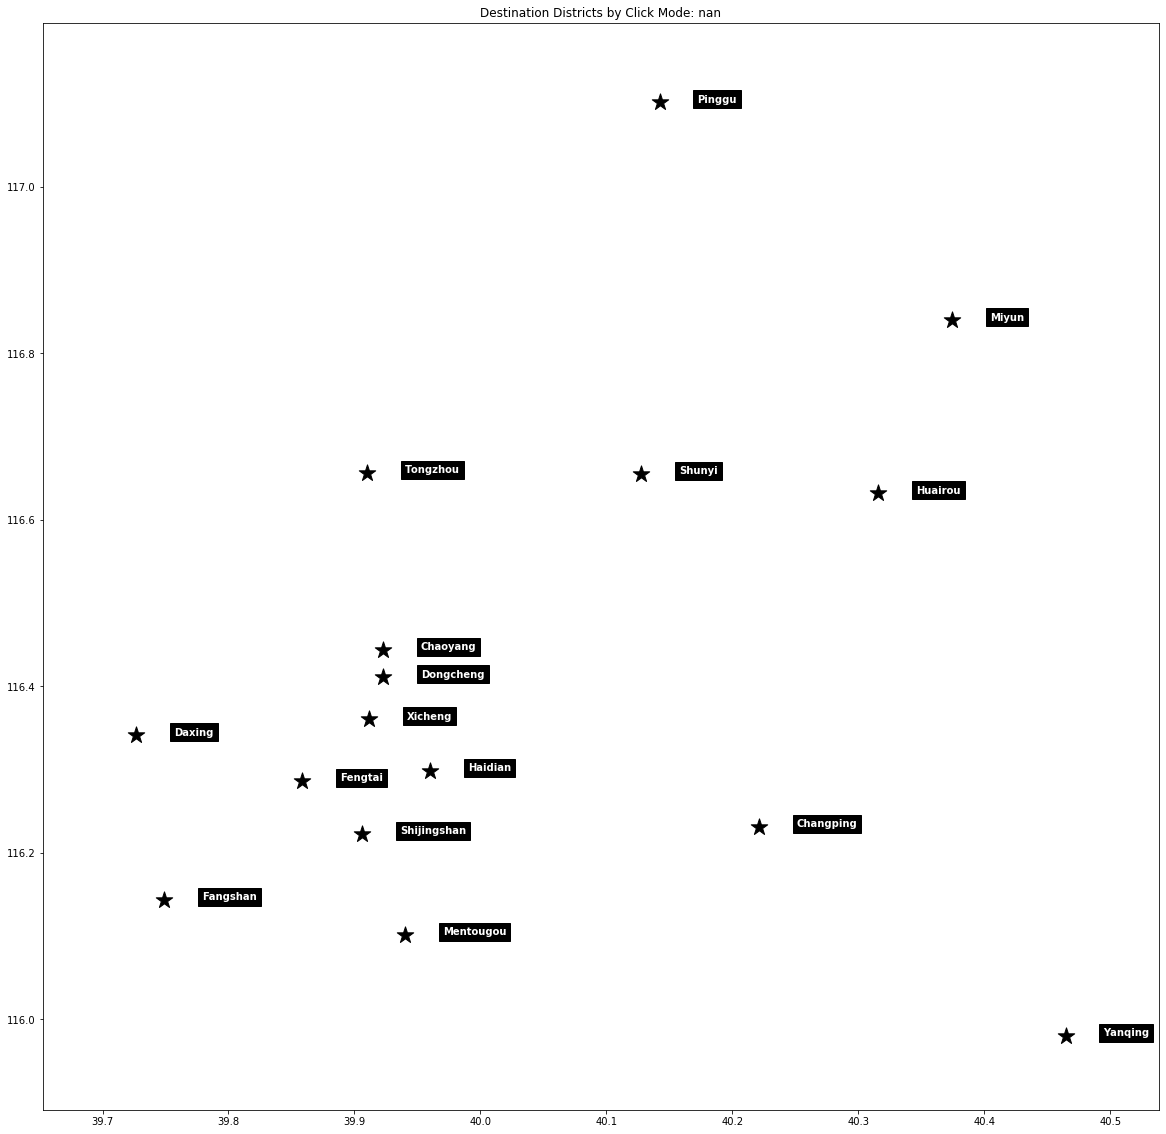

In [76]:
for cm in click_modes:
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'w', 'orange', 'brown', 'olive', 'gold', 'pink', 'aqua', 'lime', 'beige', 'indigo']
    fig, ax = plt.subplots(figsize=(20,20))
    plt.title(f'Destination Districts by Click Mode: {cm}')
    
    #excerpt data frame by click mode
    new_df = df_districts[df_districts.click_mode == cm]    
    
    #change color for every district
    for each in districts:
        df = new_df[new_df.d_district == each]
        ax.scatter(df.d_lat, df.d_long, s=10, color=colors[each], alpha=0.5)
    
    #plot district centroids
    ax.scatter(beijing_districts.o_lat, beijing_districts.o_long, color='k', marker= '*', s=300, alpha=1)
    
    #plot district name next to point
    for dis in range(len(beijing_districts)):
        name = beijing_districts['District'].iloc[dis]
        x = beijing_districts['o_lat'].iloc[dis]+0.03
        y = beijing_districts['o_long'].iloc[dis]
    
        ax.annotate(name, xy=(x, y), size=10, weight='bold', color='white', backgroundcolor='k')

    #save each figure in directory
    fig.savefig(f'../data/external/districts/click_modes/beijing_destination_districts_click_modes_bycolor/beijing_districts_clickmode_{cm}.png')

In [3]:
df_districts = pd.read_pickle("../data/external/districts/train_all_first_districts.pickle")
df_districts

,sid,click_time,click_mode,pid,req_time,o_long,o_lat,o_district,d_long,d_lat,...,d_district_14,d_district_15,d_district_2,d_district_3,d_district_4,d_district_5,d_district_6,d_district_7,d_district_8,d_district_9
0,2848914.0,2018-11-17 18:42:17,1.0,101804.0,2018-11-17 12:56:15,116.36,40.07,o_district_5,116.00,40.35,...,0,1,0,0,0,0,0,0,0,0
1,2848913.0,2018-11-17 22:25:29,2.0,101804.0,2018-11-17 22:25:16,116.41,39.92,o_district_0,116.39,39.99,...,0,0,0,0,0,0,0,0,0,0
2,2542469.0,2018-11-19 10:30:57,2.0,101804.0,2018-11-19 10:30:50,116.61,40.05,o_district_9,116.41,39.92,...,0,0,0,0,0,0,0,0,0,0
3,381188.0,2018-10-05 12:37:07,2.0,101804.0,2018-10-05 12:37:05,116.42,39.88,o_district_0,116.58,40.08,...,0,0,0,0,0,0,0,0,0,1
4,1601376.0,2018-10-03 13:32:30,1.0,101804.0,2018-10-03 13:27:35,116.37,39.95,o_district_1,116.39,39.89,...,0,0,0,0,0,0,0,0,0,0
5,1601375.0,2018-10-03 12:12:42,1.0,101804.0,2018-10-03 07:36:13,116.18,40.23,o_district_10,116.00,40.36,...,0,1,0,0,0,0,0,0,0,0
6,3064093.0,2018-11-16 13:31:34,2.0,101804.0,2018-11-16 13:30:59,116.41,39.92,o_district_0,116.39,39.91,...,0,0,0,0,0,0,0,0,0,0
7,381189.0,2018-10-05 12:41:08,2.0,101804.0,2018-10-05 12:41:07,116.42,39.88,o_district_0,116.58,40.08,...,0,0,0,0,0,0,0,0,0,1
8,3064092.0,2018-11-16 14:14:56,2.0,101804.0,2018-11-16 14:14:55,116.41,39.92,o_district_0,116.39,39.91,...,0,0,0,0,0,0,0,0,0,0
9,299386.0,2018-10-04 20:55:27,1.0,101804.0,2018-10-04 20:55:20,116.39,39.89,o_district_1,116.41,39.89,...,0,0,0,0,0,0,0,0,0,0


In [84]:
get_districts = df_districts.o_district.unique()
get_districts.sort()
districts = []

for each in get_districts:
    districts.append(each)

districts

['o_district_0',
 'o_district_1',
 'o_district_10',
 'o_district_11',
 'o_district_12',
 'o_district_13',
 'o_district_14',
 'o_district_15',
 'o_district_2',
 'o_district_3',
 'o_district_4',
 'o_district_5',
 'o_district_6',
 'o_district_7',
 'o_district_8',
 'o_district_9']

In [8]:
x = df_districts[df_districts.o_district == 'o_district_5']
x

,sid,click_time,click_mode,pid,req_time,o_long,o_lat,o_district,d_long,d_lat,...,d_district_14,d_district_15,d_district_2,d_district_3,d_district_4,d_district_5,d_district_6,d_district_7,d_district_8,d_district_9
0,2848914.0,2018-11-17 18:42:17,1.0,101804.0,2018-11-17 12:56:15,116.36,40.07,o_district_5,116.00,40.35,...,0,1,0,0,0,0,0,0,0,0
12,2629085.0,2018-10-12 16:28:13,3.0,203797.0,2018-10-12 16:27:55,116.35,40.08,o_district_5,116.33,40.03,...,0,0,0,0,0,1,0,0,0,0
17,2971207.0,2018-11-02 11:28:20,7.0,203797.0,2018-11-02 11:28:17,116.34,40.09,o_district_5,116.84,40.38,...,1,0,0,0,0,0,0,0,0,0
23,2268779.0,2018-10-13 17:12:00,2.0,203797.0,2018-10-13 17:10:37,116.35,40.01,o_district_5,116.61,40.07,...,0,0,0,0,0,0,0,0,0,1
47,2992803.0,2018-11-02 23:21:31,2.0,203797.0,2018-11-02 23:21:23,116.29,39.94,o_district_5,116.20,39.99,...,0,0,0,0,1,0,0,0,0,0
51,1880980.0,2018-11-03 08:28:43,10.0,203797.0,2018-11-03 08:27:59,116.29,39.94,o_district_5,116.20,39.99,...,0,0,0,0,1,0,0,0,0,0
54,3077789.0,2018-11-16 15:55:46,2.0,203797.0,2018-11-16 15:55:37,116.27,40.03,o_district_5,116.29,39.95,...,0,0,0,0,0,1,0,0,0,0
62,1880979.0,2018-11-03 08:26:58,10.0,203797.0,2018-11-03 08:26:51,116.29,39.94,o_district_5,116.20,39.99,...,0,0,0,0,1,0,0,0,0,0
86,70821.0,2018-10-31 20:53:28,5.0,203797.0,2018-10-31 20:53:25,116.31,39.97,o_district_5,116.31,39.97,...,0,0,0,0,0,1,0,0,0,0
89,2268783.0,2018-10-13 17:22:21,10.0,203797.0,2018-10-13 17:22:16,116.35,40.00,o_district_5,116.61,40.07,...,0,0,0,0,0,0,0,0,0,1


In [31]:
array = df_districts['o_district'].values[0].split(', ')
split_array = []

for each in array:
    split = each.split(', ')
    split_array.append(split)
split_array

[['o_district_5'],
 ['o_district_0'],
 ['o_district_9'],
 ['o_district_0'],
 ['o_district_1'],
 ['o_district_10'],
 ['o_district_0'],
 ['o_district_0'],
 ['o_district_0'],
 ['o_district_1'],
 ['o_district_0'],
 ['o_district_0'],
 ['o_district_5'],
 ['o_district_7'],
 ['o_district_0'],
 ['o_district_3'],
 ['o_district_2'],
 ['o_district_5'],
 ['o_district_8'],
 ['o_district_2'],
 ['o_district_7'],
 ['o_district_3'],
 ['o_district_11'],
 ['o_district_5'],
 ['o_district_2'],
 ['o_district_2'],
 ['o_district_2'],
 ['o_district_2'],
 ['o_district_1'],
 ['o_district_0'],
 ['o_district_11'],
 ['o_district_0'],
 ['o_district_2'],
 ['o_district_2'],
 ['o_district_11'],
 ['o_district_2'],
 ['o_district_0'],
 ['o_district_2'],
 ['o_district_3'],
 ['o_district_1'],
 ['o_district_8'],
 ['o_district_1'],
 ['o_district_4'],
 ['o_district_0'],
 ['o_district_9'],
 ['o_district_3'],
 ['o_district_2'],
 ['o_district_5'],
 ['o_district_10'],
 ['o_district_6'],
 ['o_district_1'],
 ['o_district_5'],
 ['o_di

In [55]:
districts = []

for nr in range(len(split_array)):
    z = split_array[nr][0].split('o_district_')
    districts.append(z[1])
districts

['5',
 '0',
 '9',
 '0',
 '1',
 '10',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '5',
 '7',
 '0',
 '3',
 '2',
 '5',
 '8',
 '2',
 '7',
 '3',
 '11',
 '5',
 '2',
 '2',
 '2',
 '2',
 '1',
 '0',
 '11',
 '0',
 '2',
 '2',
 '11',
 '2',
 '0',
 '2',
 '3',
 '1',
 '8',
 '1',
 '4',
 '0',
 '9',
 '3',
 '2',
 '5',
 '10',
 '6',
 '1',
 '5',
 '2',
 '0',
 '5',
 '0',
 '3',
 '2',
 '8',
 '1',
 '0',
 '0',
 '5',
 '4',
 '9',
 '2',
 '1',
 '2',
 '0',
 '7',
 '9',
 '2',
 '7',
 '3',
 '4',
 '2',
 '1',
 '2',
 '7',
 '1',
 '8',
 '2',
 '1',
 '3',
 '2',
 '8',
 '5',
 '2',
 '10',
 '5',
 '1',
 '5',
 '2',
 '5',
 '2',
 '5',
 '2',
 '5',
 '2',
 '1',
 '5',
 '5',
 '2',
 '5',
 '2',
 '8',
 '5',
 '2',
 '4',
 '2',
 '2',
 '2',
 '0',
 '11',
 '0',
 '11',
 '4',
 '5',
 '0',
 '9',
 '5',
 '1',
 '0',
 '5',
 '2',
 '0',
 '11',
 '10',
 '5',
 '10',
 '5',
 '5',
 '1',
 '1',
 '1',
 '1',
 '5',
 '2',
 '2',
 '1',
 '1',
 '5',
 '2',
 '1',
 '5',
 '2',
 '1',
 '5',
 '1',
 '3',
 '0',
 '5',
 '5',
 '5',
 '2',
 '5',
 '6',
 '11',
 '2',
 '6',
 '2',
 '5',
 '5',
 '1',
 '5'

In [70]:
def get_districts(df):
    array = df['o_district'].values
    split_array = []
    districts = []

    for each in array:
        split = each.split(', ')
        split_array.append(split)

    for nr in range(len(split_array)):
        z = split_array[nr][0].split('o_district_')
        districts.append(z[1])
    
    districts.unique()
    districts.sort()

    return districts

In [71]:
get_districts(df_districts)

AttributeError: 'list' object has no attribute 'unique'

In [82]:
array = df_districts['o_district'].values
split_array = []
districts = []

for each in array:
    split = each.split(', ')
    split_array.append(split)

for nr in range(len(split_array)):
    z = split_array[nr][0].split('o_district_')
    if z[1] not in districts:
        districts.append(z[1])
districts.sort()
districts

['0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9']

In [86]:
dis = 'o_district'
x = df_districts[df_districts.dis == 'o_district_5']
x

AttributeError: 'DataFrame' object has no attribute 'dis'